In [1]:
import os, sys

In [2]:
sys.path.append('../')

In [20]:
import numpy as np

In [3]:
from core.utils.data import define_dataset

In [4]:
from core.utils.inference import inference_phase_rUNet, inference_phase_rUNet_plot_notebook

In [5]:
from core.models import rUNet

In [6]:
from tqdm.notebook import tqdm

In [7]:
import torch

In [8]:
import matplotlib.pyplot as plt

In [9]:
model = rUNet(out_size=1)
torch.cuda.empty_cache()

In [10]:
checkpoint=torch.load('/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss/Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl')['model_state_dict']

In [11]:
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [12]:
device = torch.device("cuda:{}".format(0) if torch.cuda.is_available() else "cpu")
model.eval()
model.to(device);

In [13]:
data_dir = os.path.join('/','storage','yw18581','data')

In [14]:
root_folder_pos2 = os.path.join(data_dir, 'Pos2_time1934_8bit_cropped')

In [15]:
root_folder_pos1 = os.path.join(data_dir, 'Pos1_time1901_8bit_cropped')

In [16]:
pos2_top_right_1_inv = os.path.join(root_folder_pos2, 'top_right_1_inv')

In [17]:
data_loaders, data_lengths = define_dataset(root_folder=pos2_top_right_1_inv,
                                           fname_key='File', alldata=True,
                                           batch_size=1, load_mask=False,
                                           row_slice=slice(0,1400),
                                           col_slice=slice(1000,None))

In [18]:
data_lengths

201

batch 1, corr 0.01
1: pred_dist: [2.0963786]


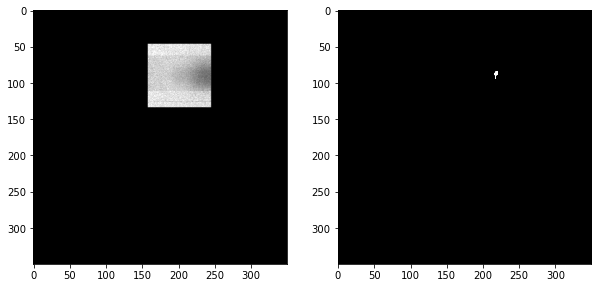

batch 2, corr 0.01
1: pred_dist: [2.1193607]


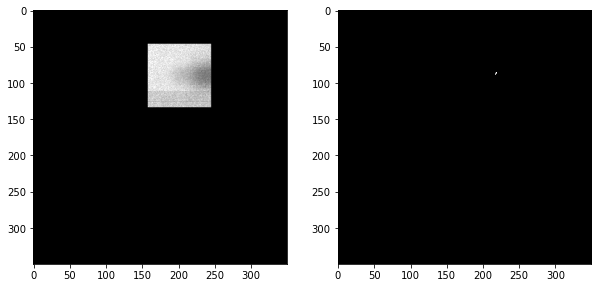

batch 1, corr 0.03
1: pred_dist: [2.1012893]


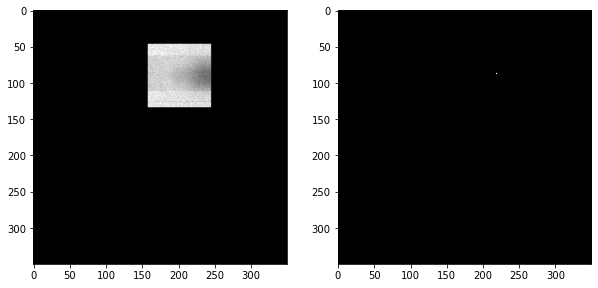

batch 2, corr 0.03
1: pred_dist: [2.1242058]


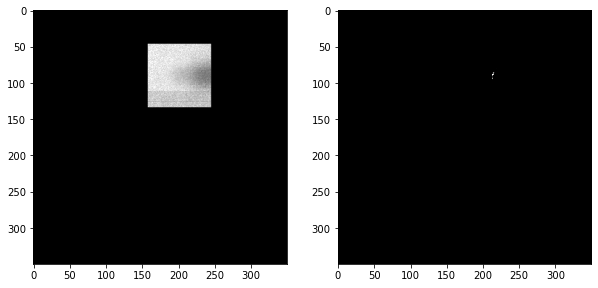

batch 1, corr 0.049999999999999996
1: pred_dist: [2.1044655]


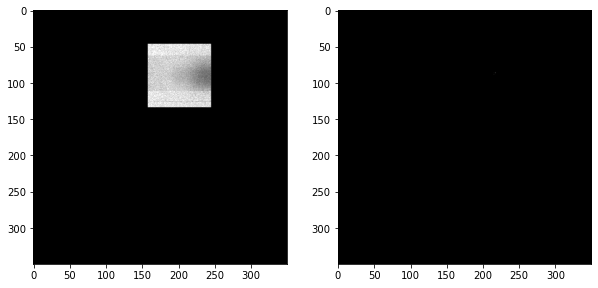

batch 2, corr 0.049999999999999996
1: pred_dist: [2.1270015]


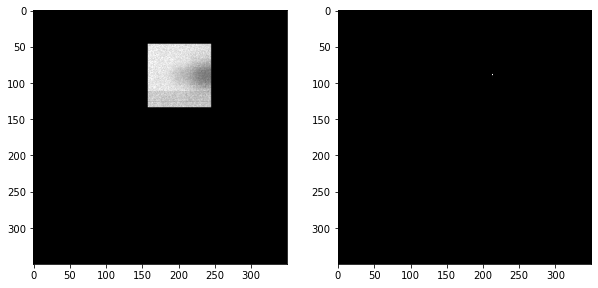

batch 1, corr 0.06999999999999999
1: pred_dist: [2.1107588]


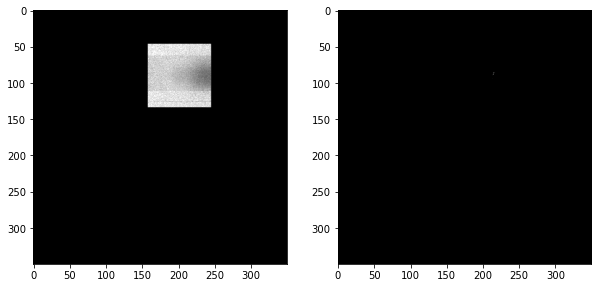

batch 2, corr 0.06999999999999999
1: pred_dist: [2.1335874]


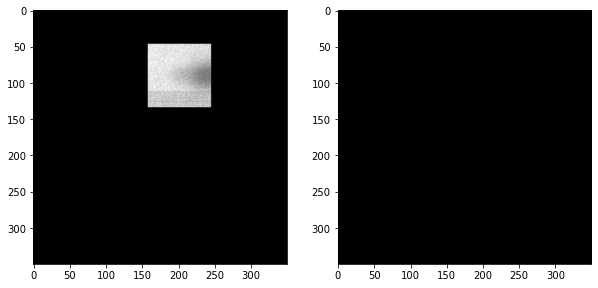

batch 1, corr 0.08999999999999998
1: pred_dist: [2.1174047]


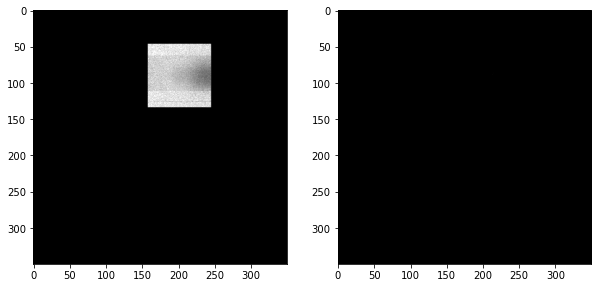

batch 2, corr 0.08999999999999998
1: pred_dist: [2.1480427]


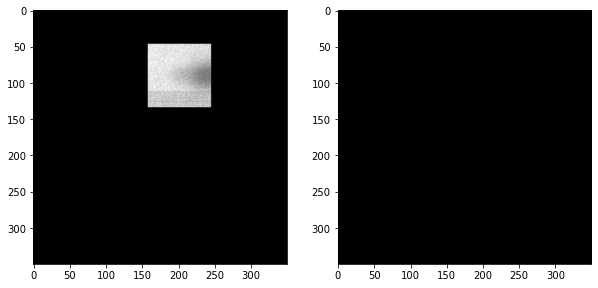

batch 1, corr 0.10999999999999997
1: pred_dist: [2.1269476]







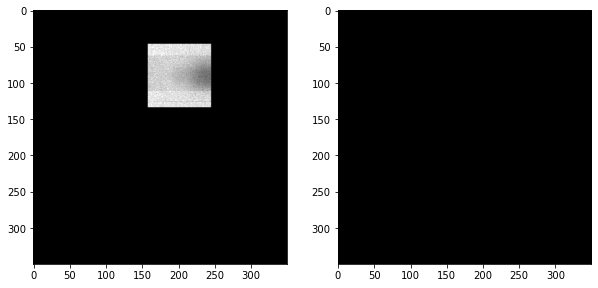

batch 2, corr 0.10999999999999997
1: pred_dist: [2.177432]


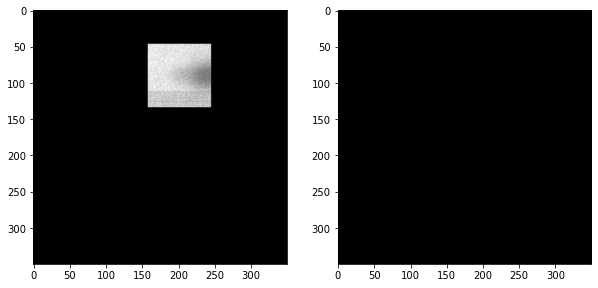

batch 1, corr 0.12999999999999998
1: pred_dist: [2.1419528]


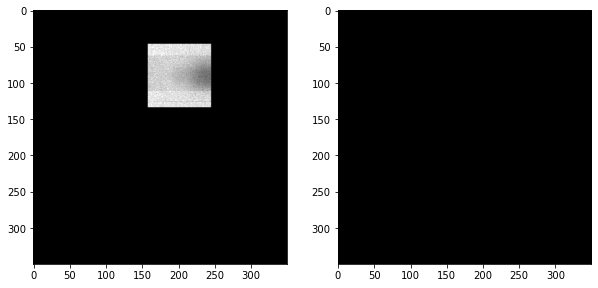

batch 2, corr 0.12999999999999998
1: pred_dist: [2.198088]


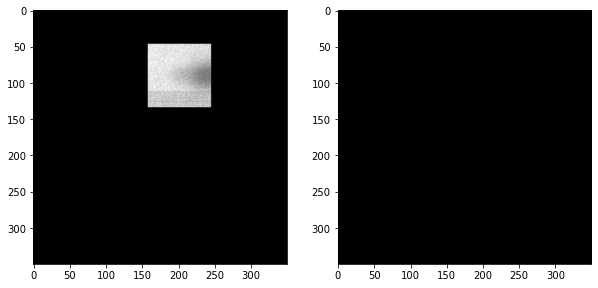

batch 1, corr 0.15
1: pred_dist: [2.1689153]


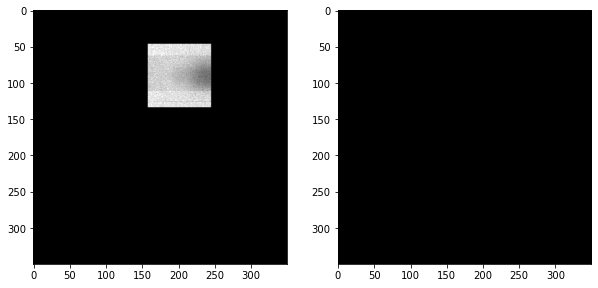

batch 2, corr 0.15
1: pred_dist: [2.2085984]


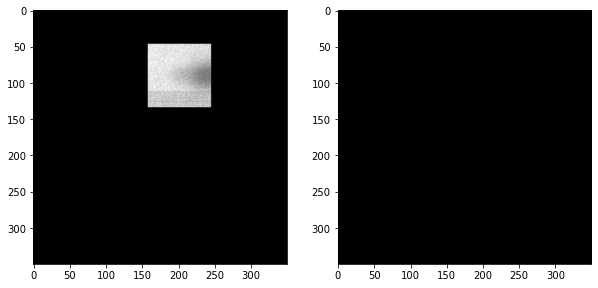

batch 1, corr 0.16999999999999998
1: pred_dist: [2.1881666]


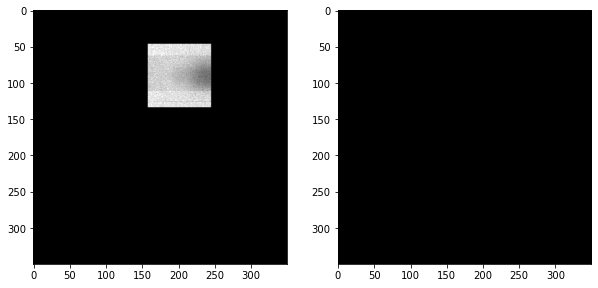

batch 2, corr 0.16999999999999998
1: pred_dist: [2.2126594]


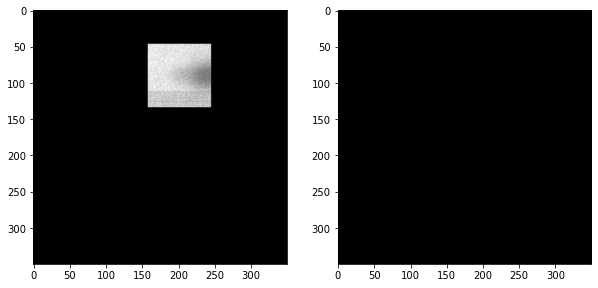

batch 1, corr 0.18999999999999997
1: pred_dist: [2.1931071]


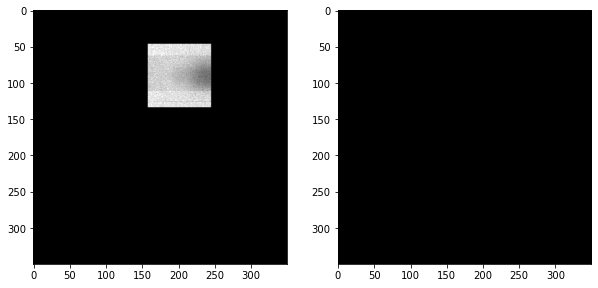

batch 2, corr 0.18999999999999997
1: pred_dist: [2.2079146]


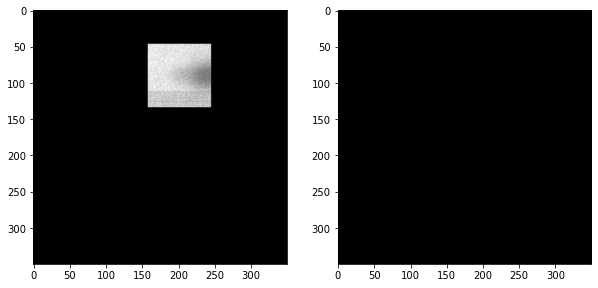

batch 1, corr 0.20999999999999996
1: pred_dist: [2.1905158]


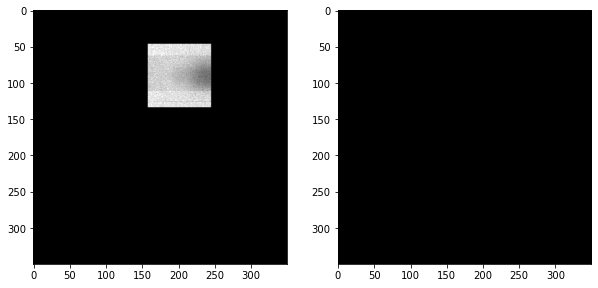

batch 2, corr 0.20999999999999996
1: pred_dist: [2.201056]


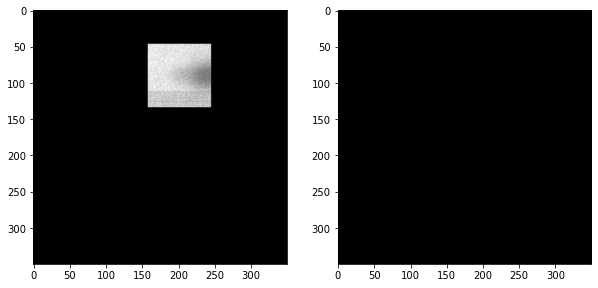

In [21]:
for corr in np.arange(0.01,0.22, 0.02):
    for i, batch in tqdm(enumerate(data_loaders), total=data_lengths, desc="Batch"):
        true_images= batch["image"]
        true_images[0]+=corr
        pred_masks, pred_dists = model(true_images.float().to(device))
        print("batch {}, corr {}".format(i + 1,corr))
        for j, (img, pr_msk, pr_dist) in enumerate(zip(true_images, pred_masks.cpu().detach().numpy(),
                                                                    pred_dists.cpu().detach().numpy())):
            print("{}: pred_dist: {}".format(j + 1, pr_dist))

            f = plt.figure(figsize=(10, 5))
            f.add_subplot(1, 2, 1)
            plt.imshow(img[0, ...], cmap='gray')
            f.add_subplot(1, 2, 2)
            plt.imshow(pr_msk[0, ...], cmap='gray')
            plt.show(block=True)

        if i ==1:
            break

In [15]:
pos2_top_right_6_inv = os.path.join(root_folder_pos2, 'top_right_6_inv')

In [16]:
data_loaders, data_lengths = define_dataset(root_folder=pos2_top_right_6_inv,
                                           fname_key='File', alldata=True,
                                           batch_size=1, load_mask=False,
                                           row_slice=slice(1400,None),
                                           col_slice=slice(1000,None))

batch 1
1: pred_dist: [2.1846204]


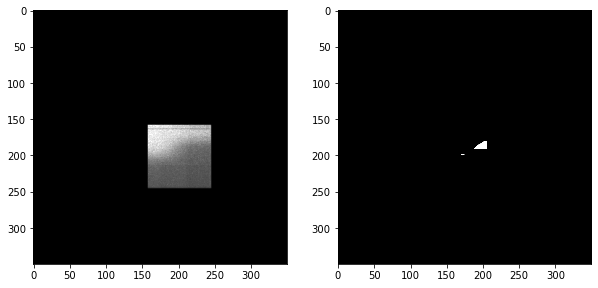

batch 2
1: pred_dist: [2.2050748]


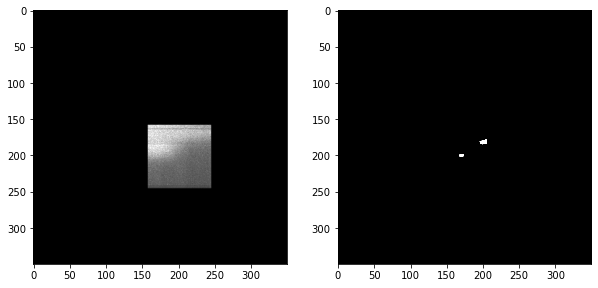

batch 3
1: pred_dist: [2.1894379]


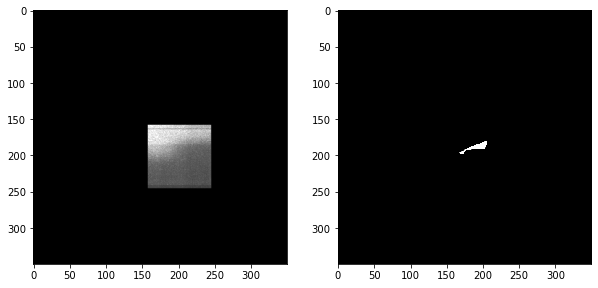

batch 4
1: pred_dist: [2.204465]


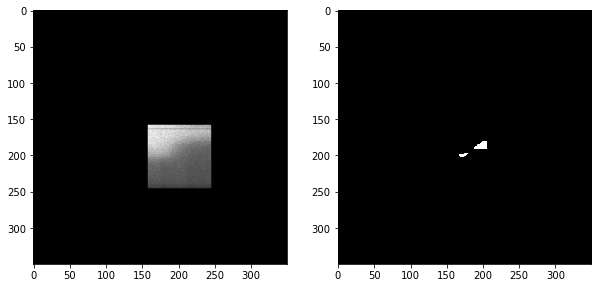

batch 5
1: pred_dist: [2.2236269]


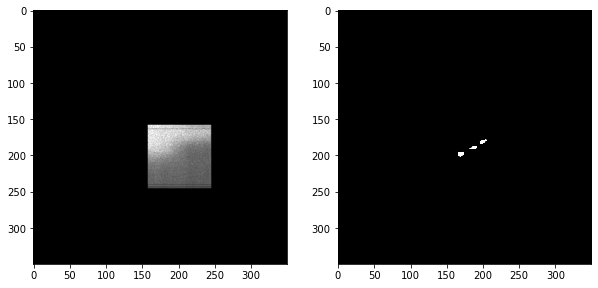

batch 6
1: pred_dist: [2.170596]


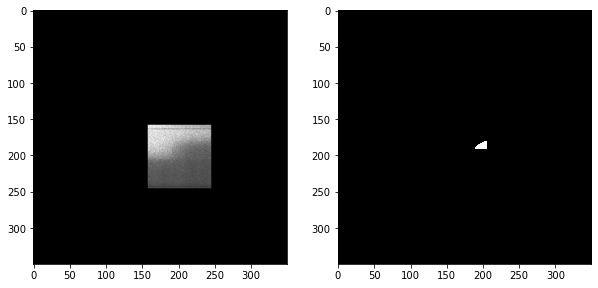

batch 7
1: pred_dist: [2.2010038]


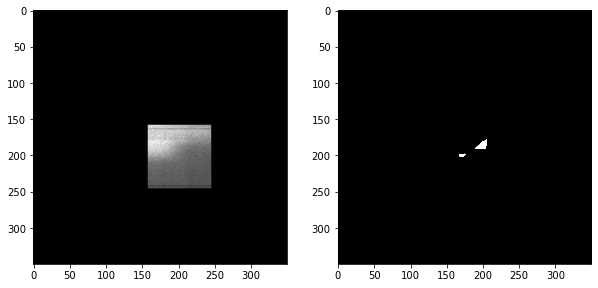

batch 8
1: pred_dist: [2.1853893]


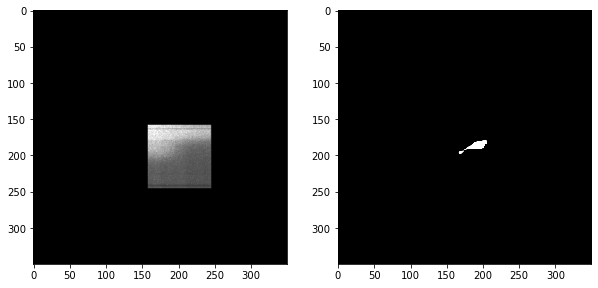

batch 9
1: pred_dist: [2.199881]


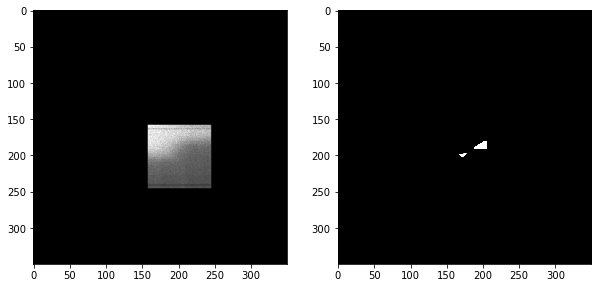

batch 10
1: pred_dist: [2.2183704]


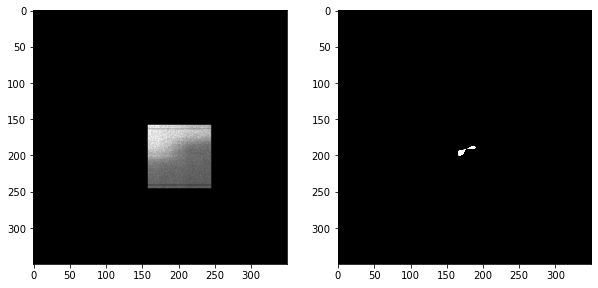

batch 11
1: pred_dist: [2.1641757]


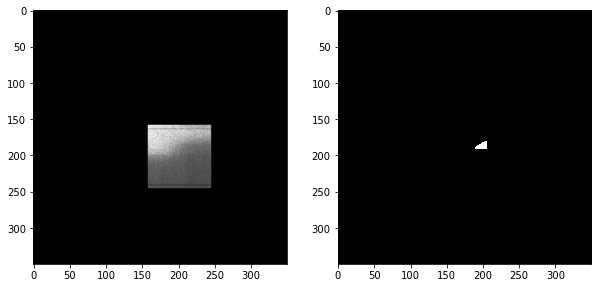

batch 12
1: pred_dist: [2.214182]


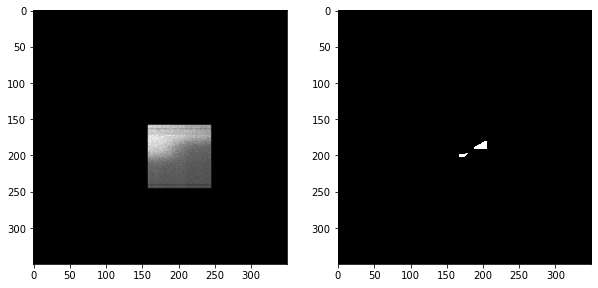

batch 13
1: pred_dist: [2.1862748]


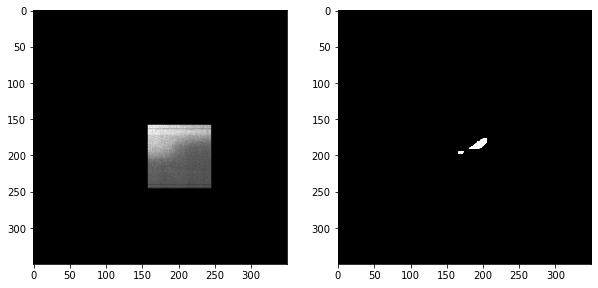

batch 14
1: pred_dist: [2.1926696]


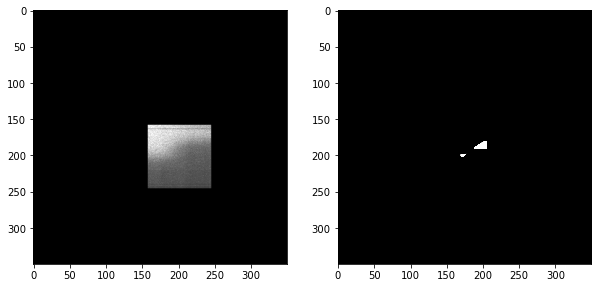

batch 15
1: pred_dist: [2.2148414]


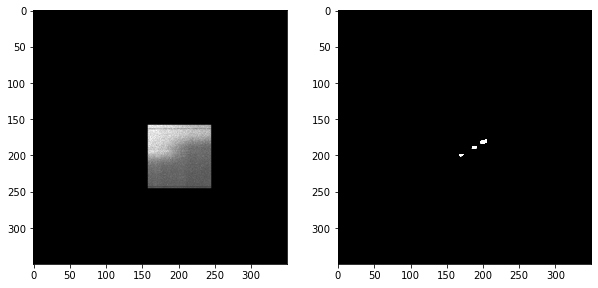

batch 16
1: pred_dist: [2.1738195]


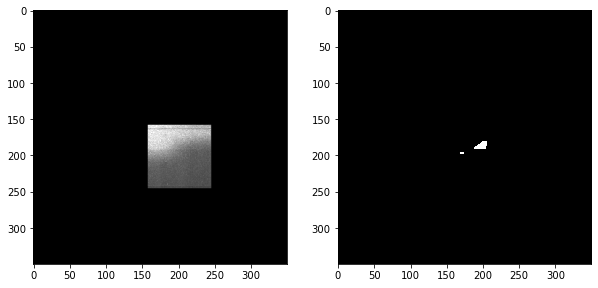

batch 17
1: pred_dist: [2.214877]


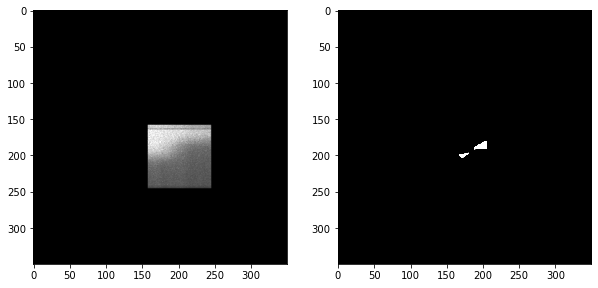

batch 18
1: pred_dist: [2.1921115]


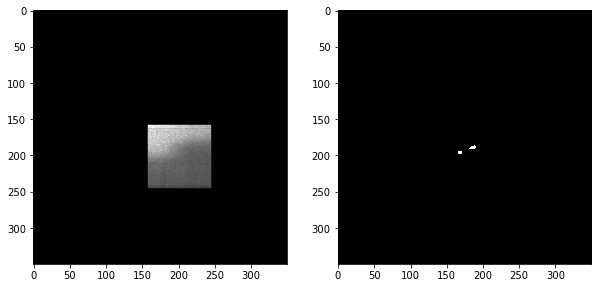

batch 19
1: pred_dist: [2.175908]


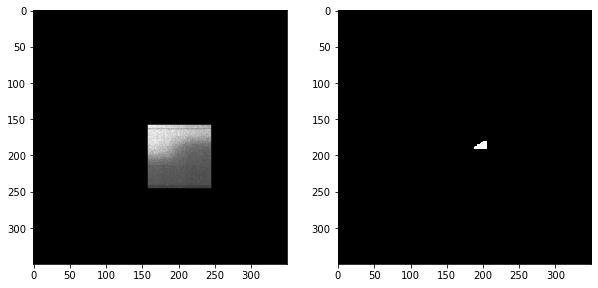

batch 20
1: pred_dist: [2.1981897]


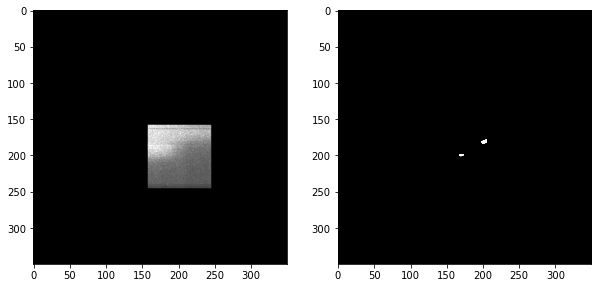

batch 21
1: pred_dist: [2.187027]


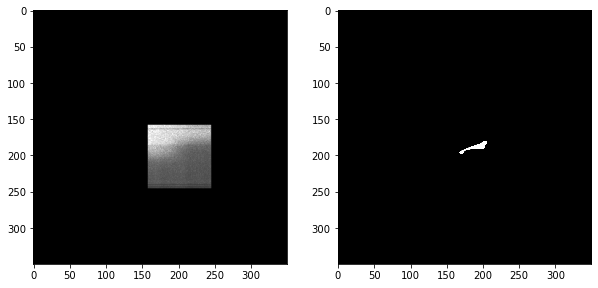

batch 22
1: pred_dist: [2.2065613]


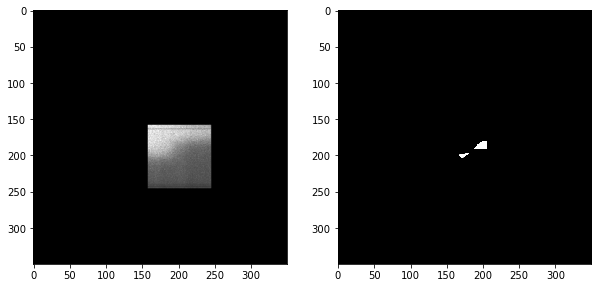

batch 23
1: pred_dist: [2.2093782]


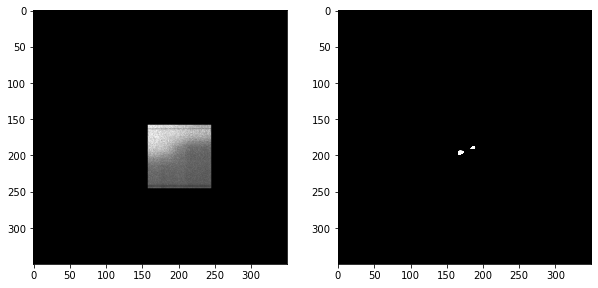

batch 24
1: pred_dist: [2.1674073]


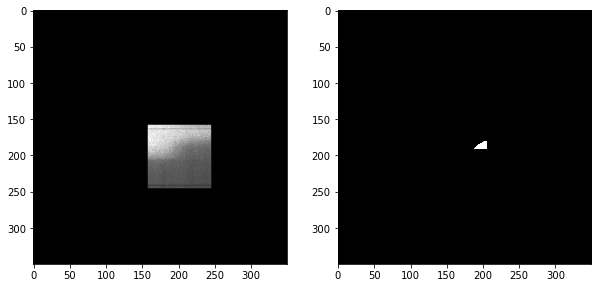

batch 25
1: pred_dist: [2.2040927]


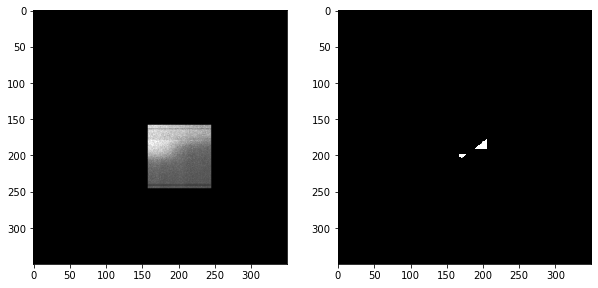

batch 26
1: pred_dist: [2.1897702]


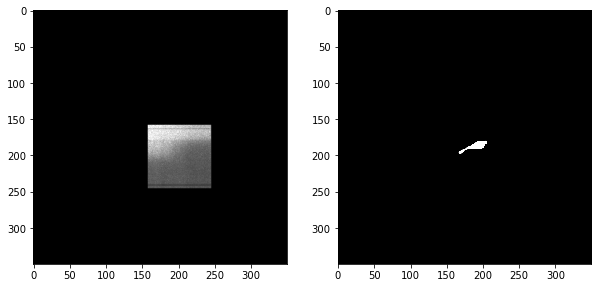

batch 27
1: pred_dist: [2.204178]


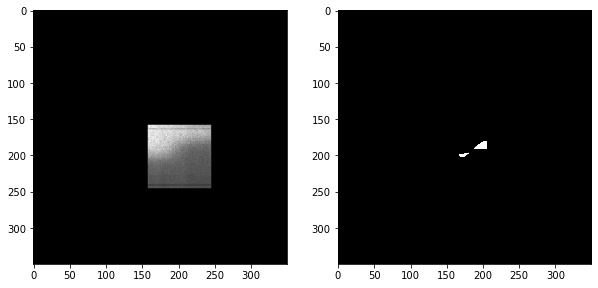

batch 28
1: pred_dist: [2.2196715]


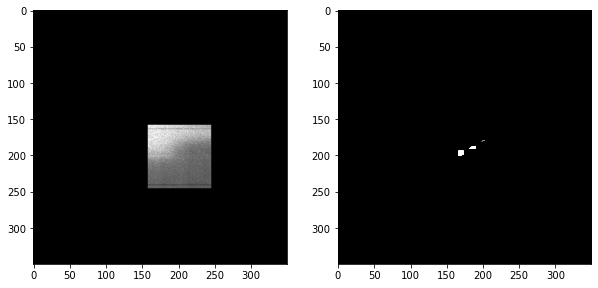

batch 29
1: pred_dist: [2.1626084]


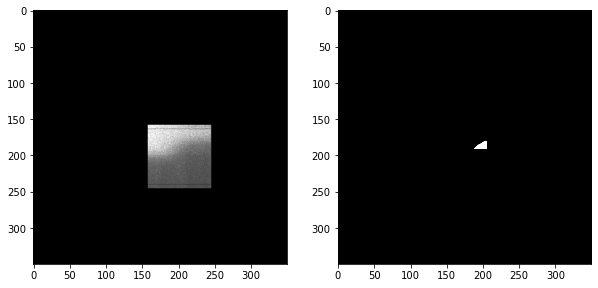

batch 30
1: pred_dist: [2.2183435]


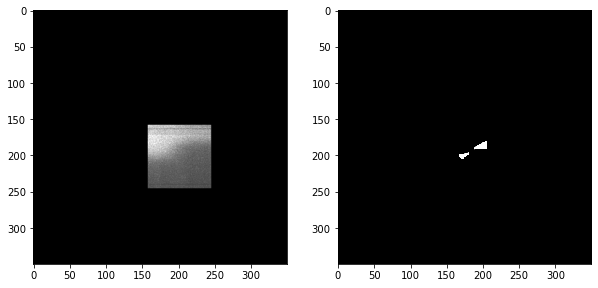

batch 31
1: pred_dist: [2.1884613]


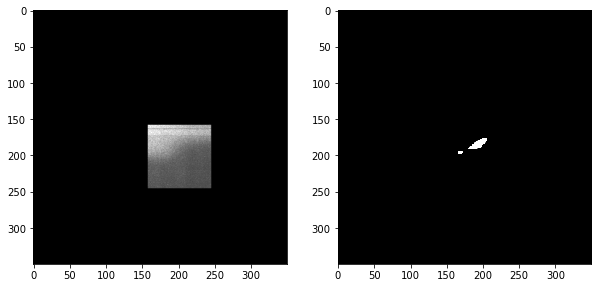

batch 32
1: pred_dist: [2.1953793]


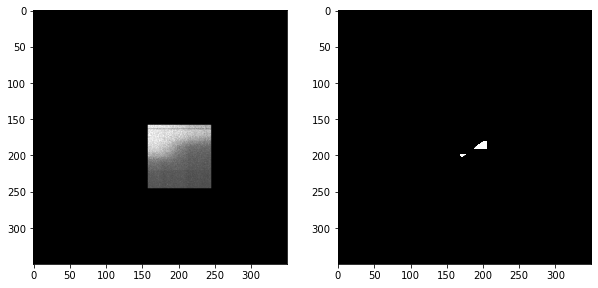

batch 33
1: pred_dist: [2.2157385]


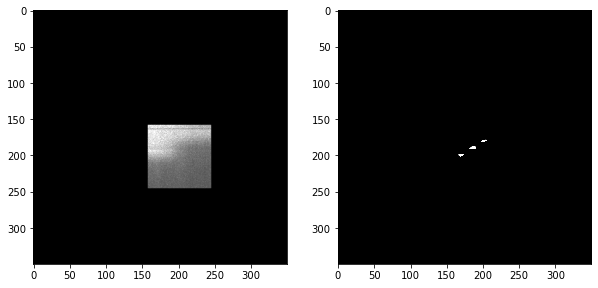

batch 34
1: pred_dist: [2.1734865]


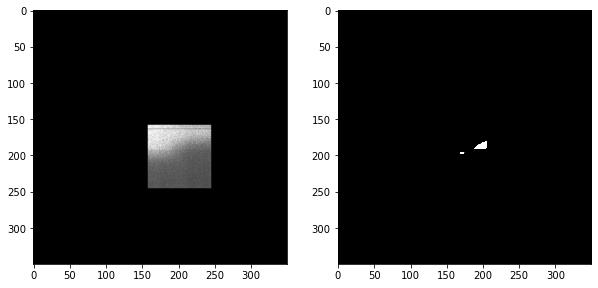

batch 35
1: pred_dist: [2.2181697]


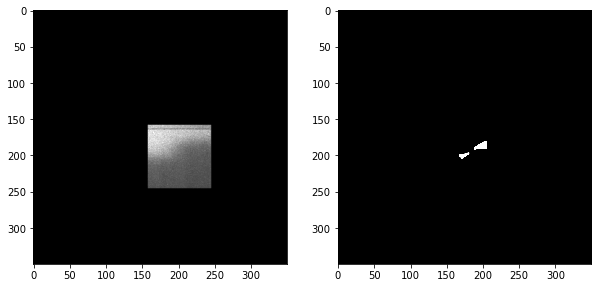

batch 36
1: pred_dist: [2.1941352]


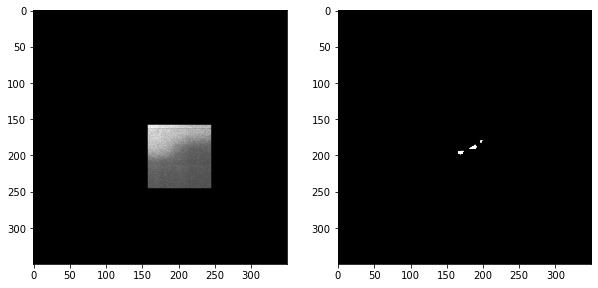

batch 37
1: pred_dist: [2.1864977]


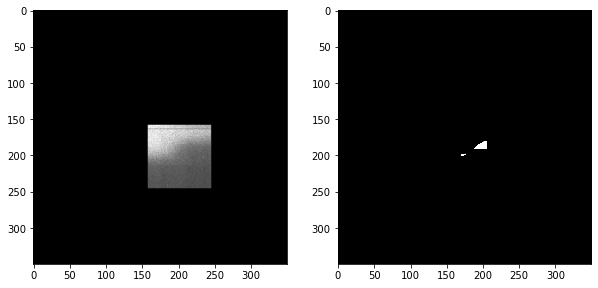

batch 38
1: pred_dist: [2.2079384]


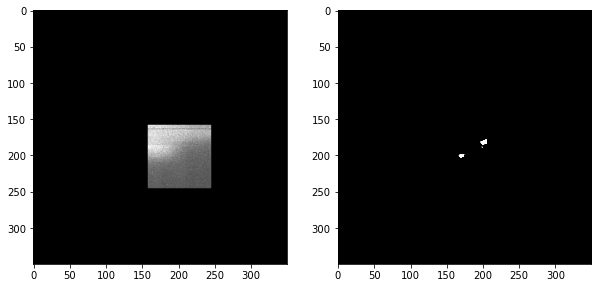

batch 39
1: pred_dist: [2.188912]


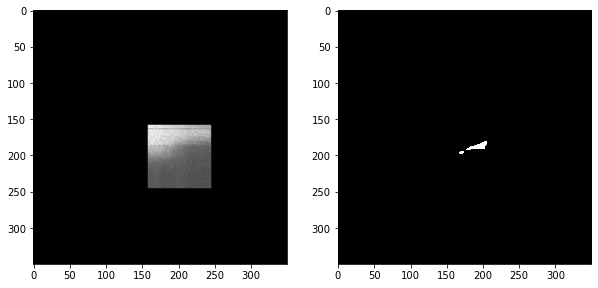

batch 40
1: pred_dist: [2.2115304]


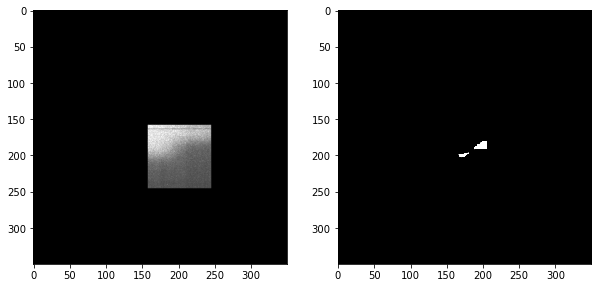

batch 41
1: pred_dist: [2.214682]


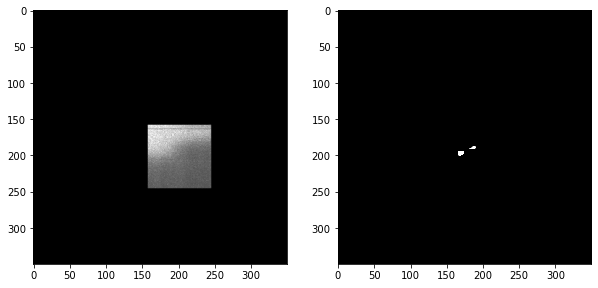

batch 42
1: pred_dist: [2.168555]


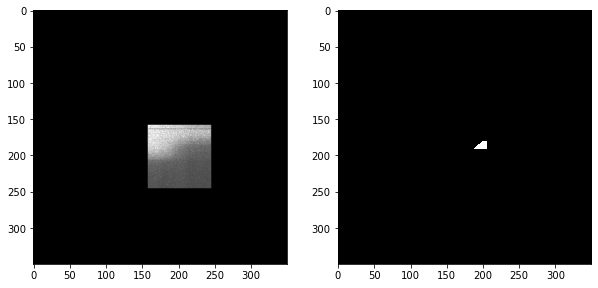

batch 43
1: pred_dist: [2.2035618]


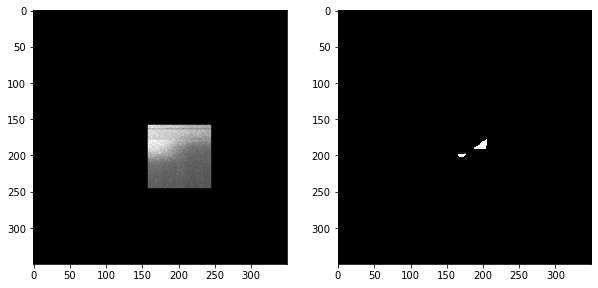

batch 44
1: pred_dist: [2.1911795]


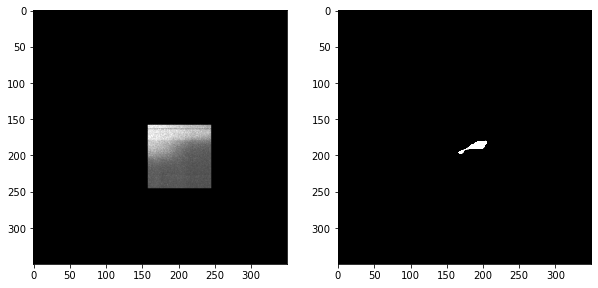

batch 45
1: pred_dist: [2.2025096]


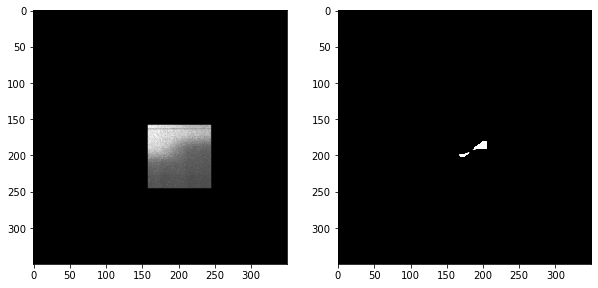

batch 46
1: pred_dist: [2.2289145]


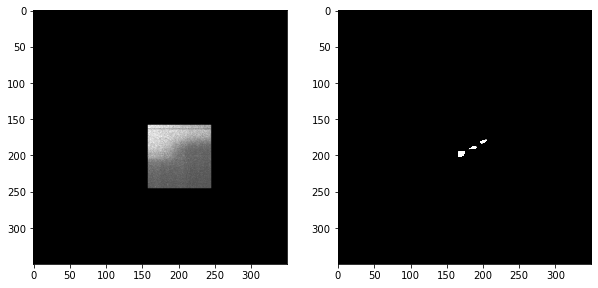

batch 47
1: pred_dist: [2.167784]


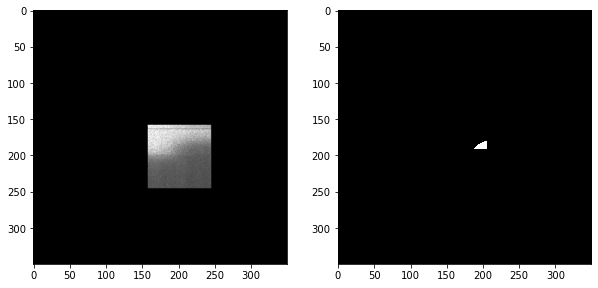

batch 48
1: pred_dist: [2.2194002]


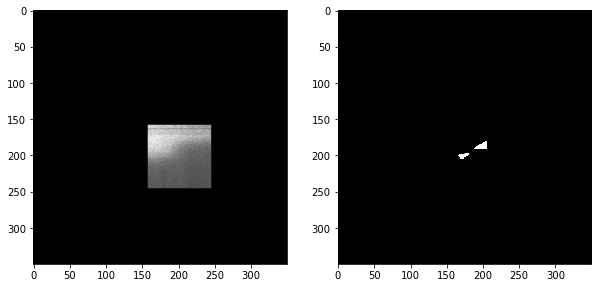

batch 49
1: pred_dist: [2.1877162]


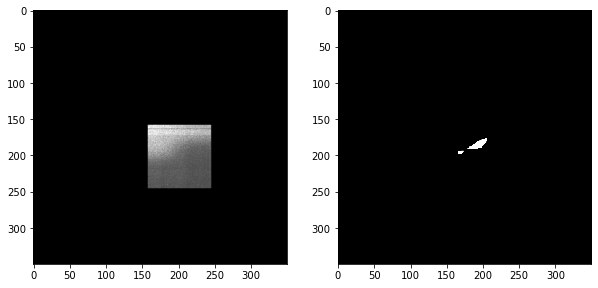

batch 50
1: pred_dist: [2.1906846]


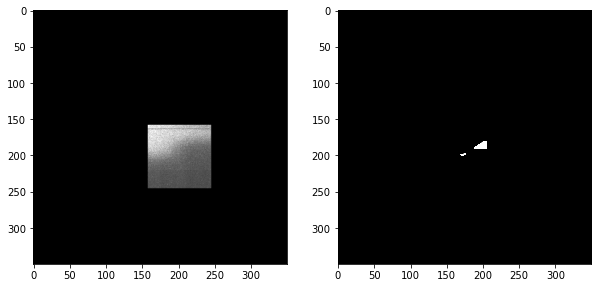

batch 51
1: pred_dist: [2.2147822]


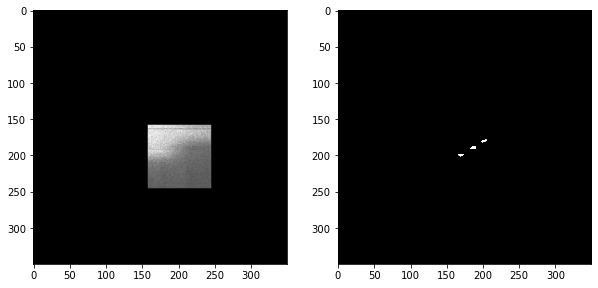

batch 52
1: pred_dist: [2.1742213]


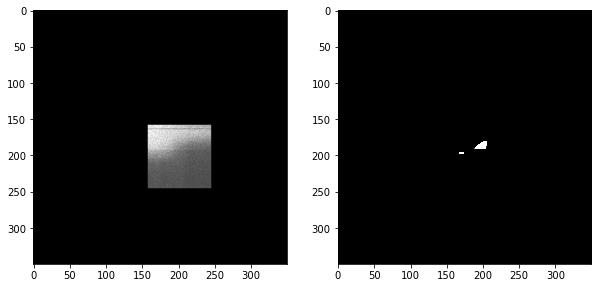

batch 53
1: pred_dist: [2.213945]


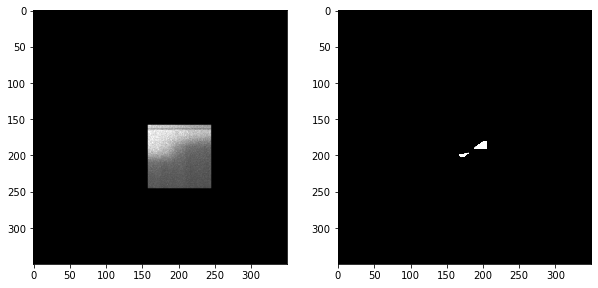

batch 54
1: pred_dist: [2.1943357]


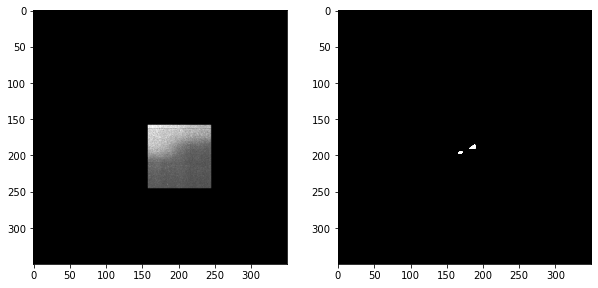

batch 55
1: pred_dist: [2.182284]


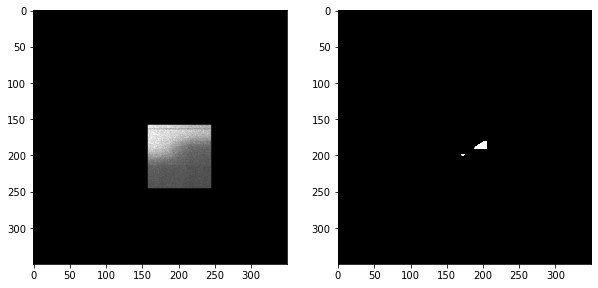

batch 56
1: pred_dist: [2.208238]


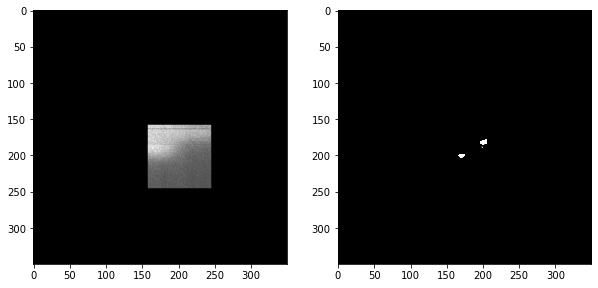

batch 57
1: pred_dist: [2.1829066]


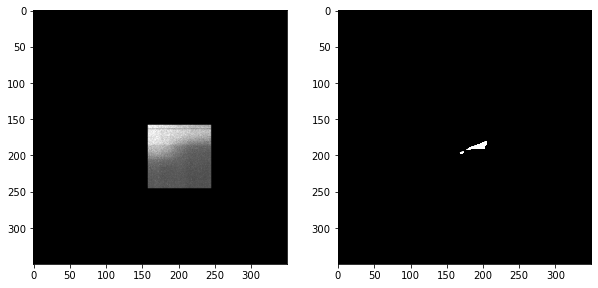

batch 58
1: pred_dist: [2.2082968]


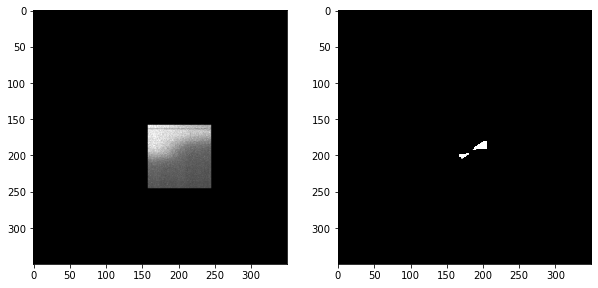

batch 59
1: pred_dist: [2.2188356]


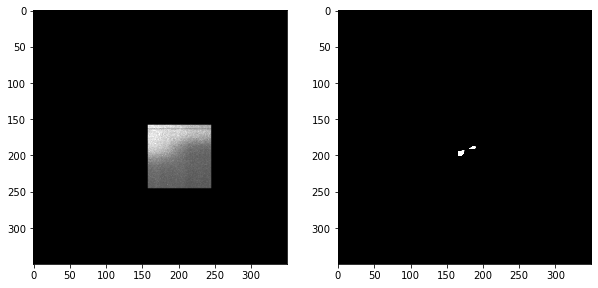

batch 60
1: pred_dist: [2.1681087]


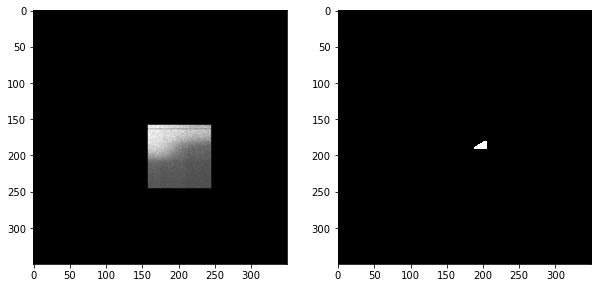

batch 61
1: pred_dist: [2.207487]


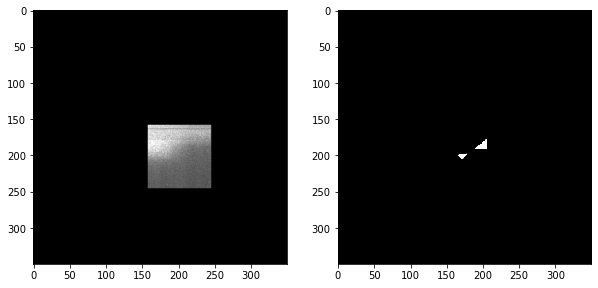

batch 62
1: pred_dist: [2.1924105]


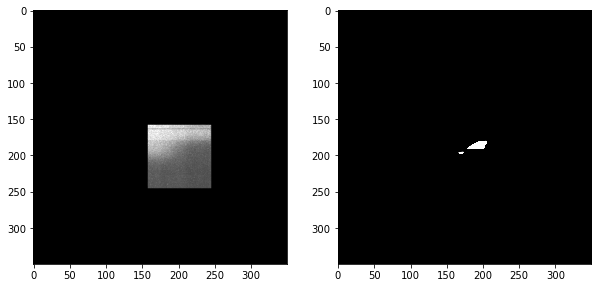

batch 63
1: pred_dist: [2.209473]


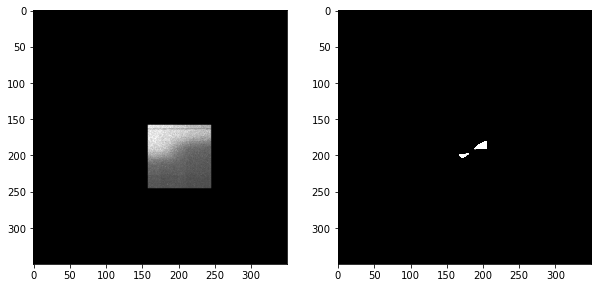

batch 64
1: pred_dist: [2.2237144]


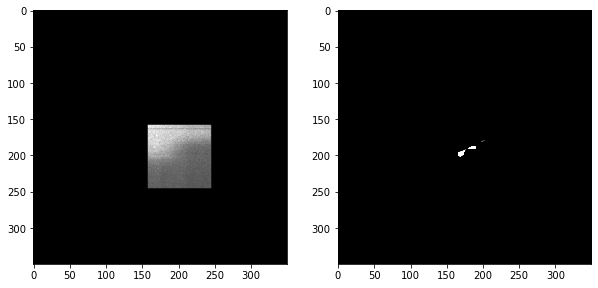

batch 65
1: pred_dist: [2.1671104]


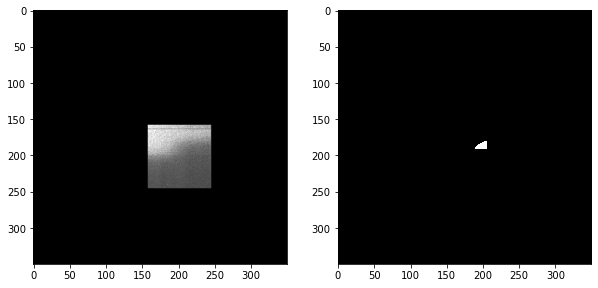

batch 66
1: pred_dist: [2.21053]


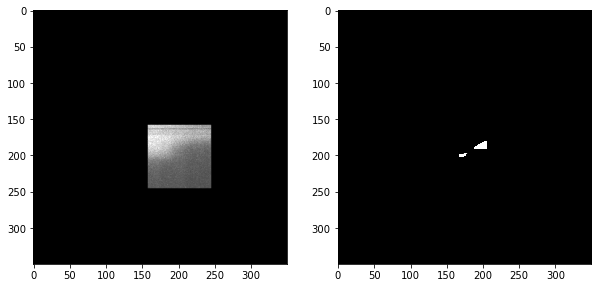

batch 67
1: pred_dist: [2.1862695]


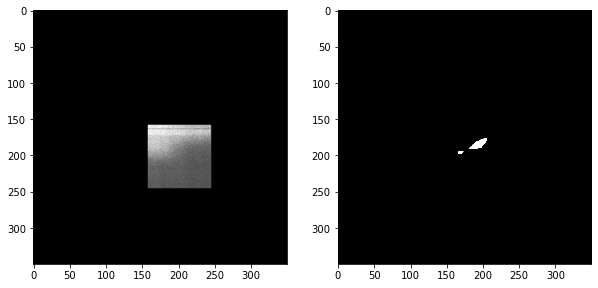

batch 68
1: pred_dist: [2.198484]


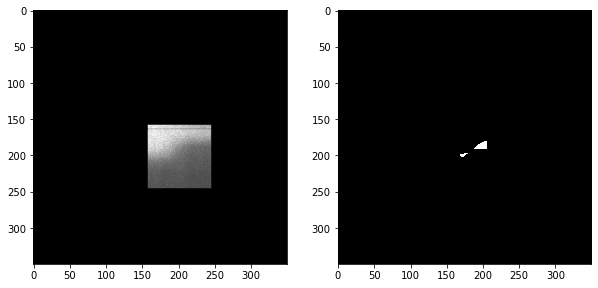

batch 69
1: pred_dist: [2.223175]


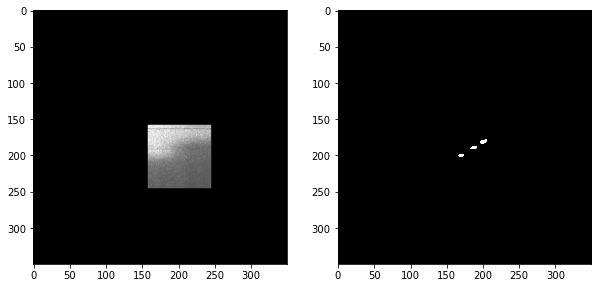

batch 70
1: pred_dist: [2.1726818]


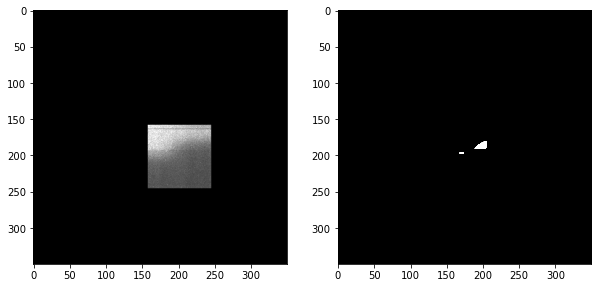

batch 71
1: pred_dist: [2.2210171]


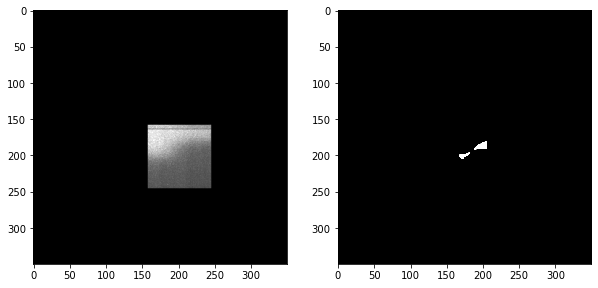

batch 72
1: pred_dist: [2.194822]


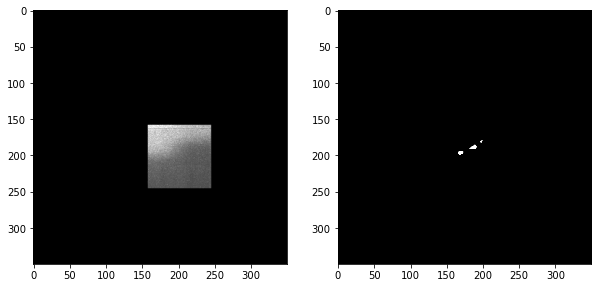

batch 73
1: pred_dist: [2.1823661]


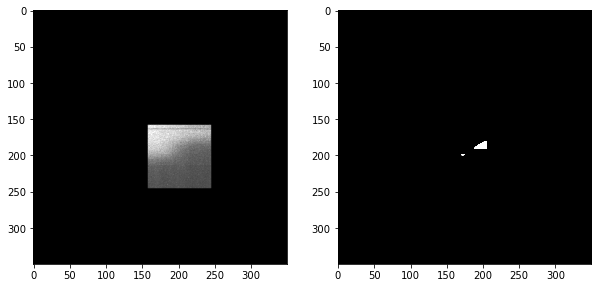

batch 74
1: pred_dist: [2.2047114]


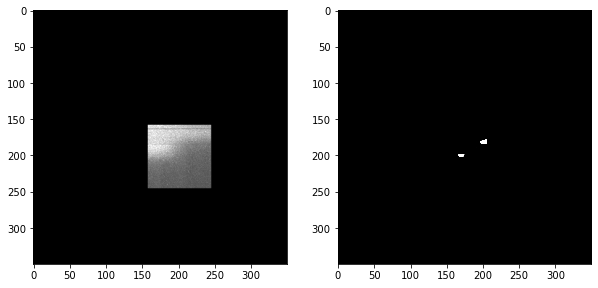

batch 75
1: pred_dist: [2.1860404]


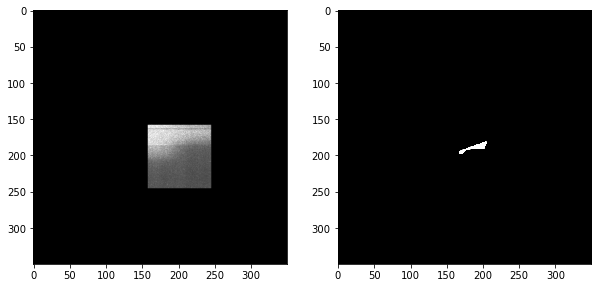

batch 76
1: pred_dist: [2.212805]


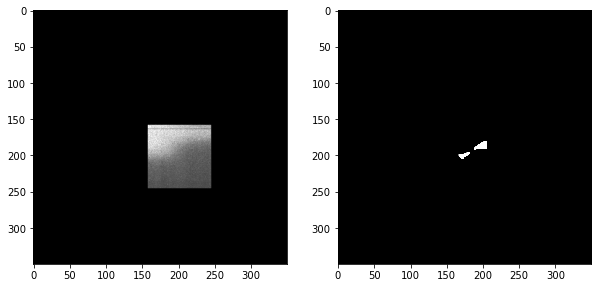

batch 77
1: pred_dist: [2.2129877]


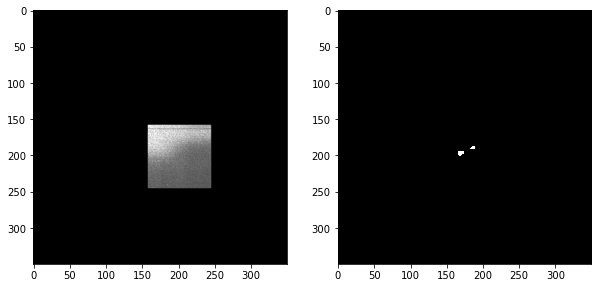

batch 78
1: pred_dist: [2.1711621]


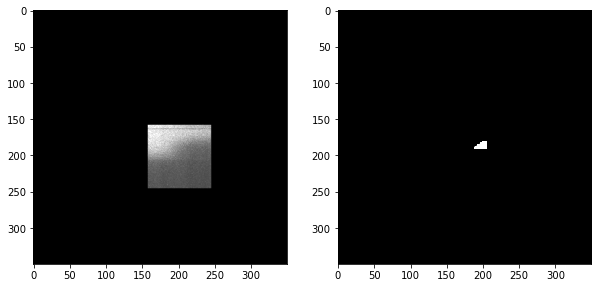

batch 79
1: pred_dist: [2.2097638]


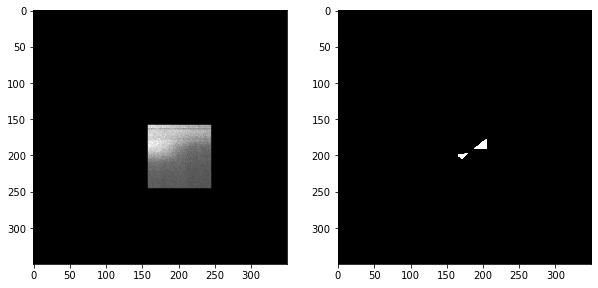

batch 80
1: pred_dist: [2.187342]


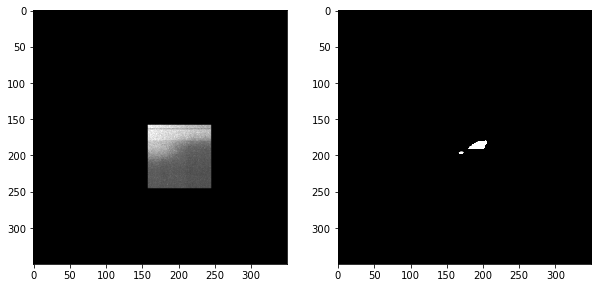

batch 81
1: pred_dist: [2.2105443]


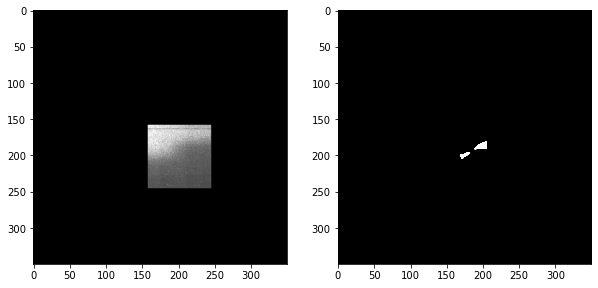

batch 82
1: pred_dist: [2.22229]


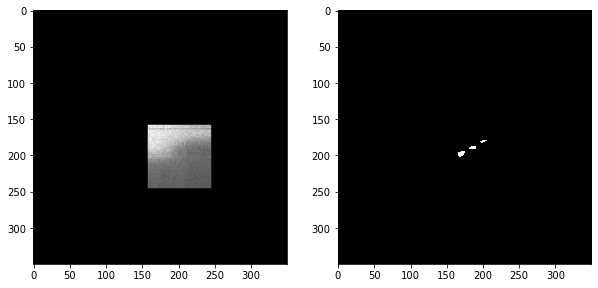

batch 83
1: pred_dist: [2.1642828]


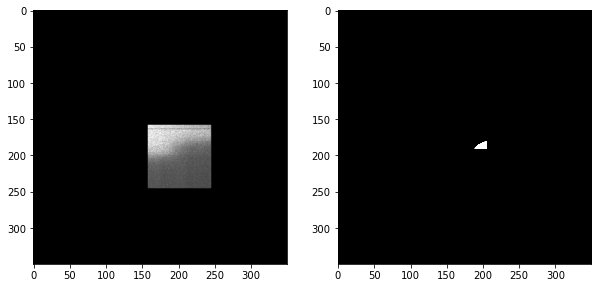

batch 84
1: pred_dist: [2.2222304]


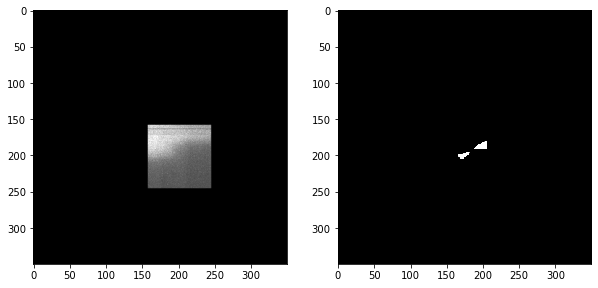

batch 85
1: pred_dist: [2.1843426]


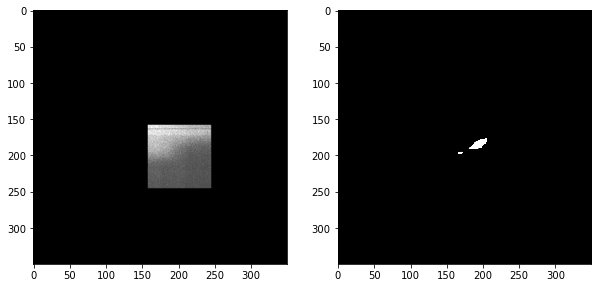

batch 86
1: pred_dist: [2.1976798]


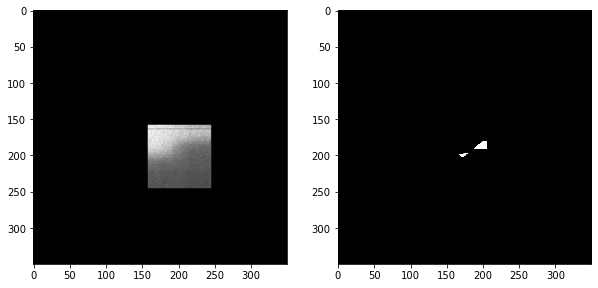

batch 87
1: pred_dist: [2.2183564]


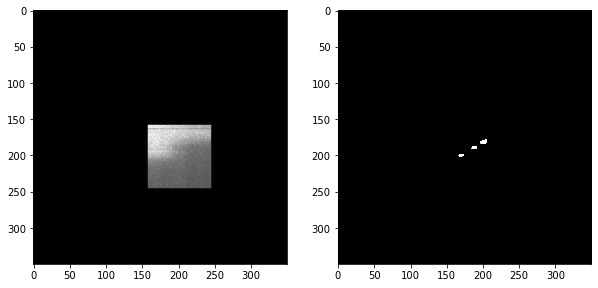

batch 88
1: pred_dist: [2.1767118]


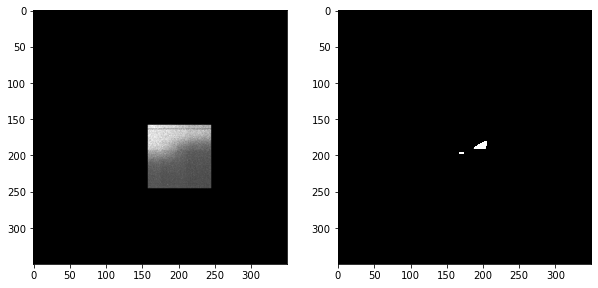

batch 89
1: pred_dist: [2.2187965]


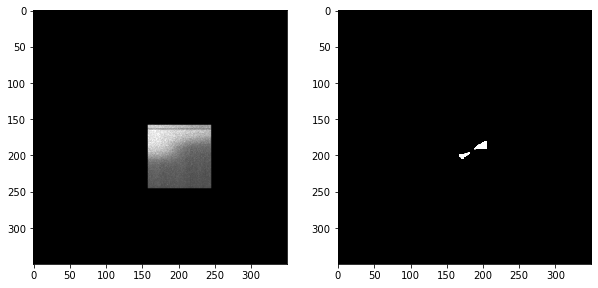

batch 90
1: pred_dist: [2.193521]


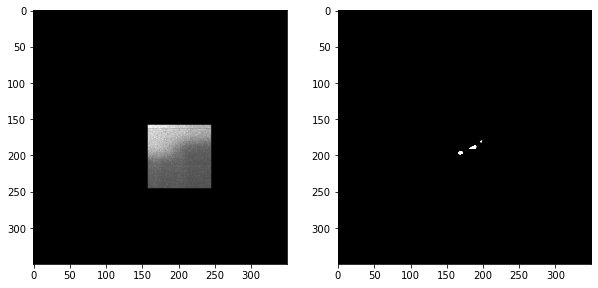

batch 91
1: pred_dist: [2.1821475]


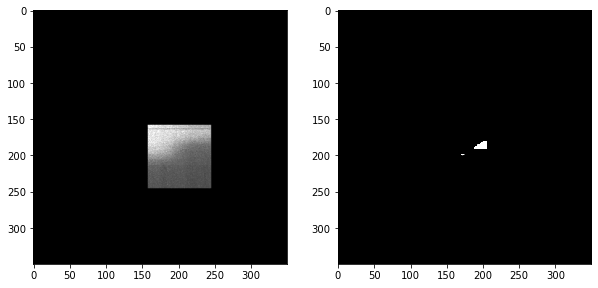

batch 92
1: pred_dist: [2.2113478]


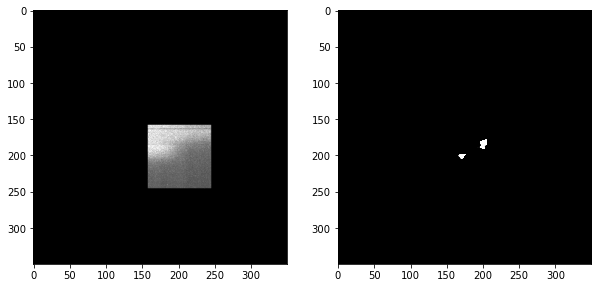

batch 93
1: pred_dist: [2.1907265]


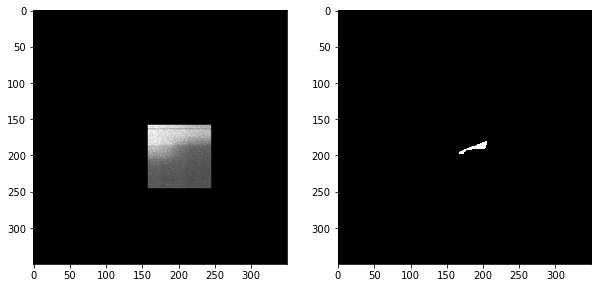

batch 94
1: pred_dist: [2.2107067]


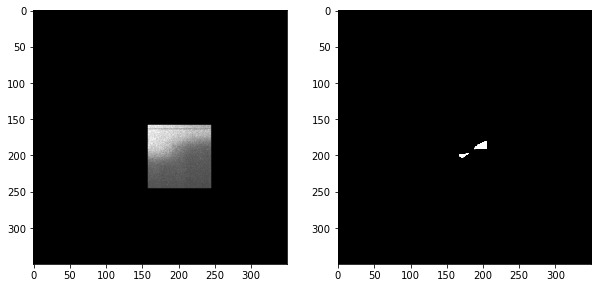

batch 95
1: pred_dist: [2.2156007]


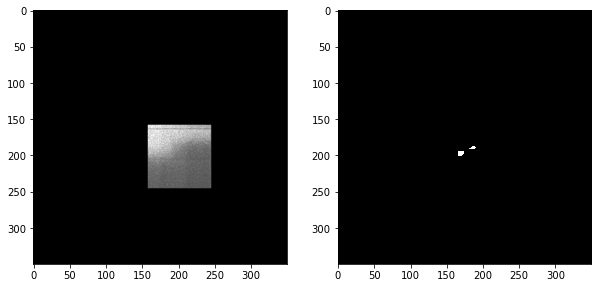

batch 96
1: pred_dist: [2.1686585]


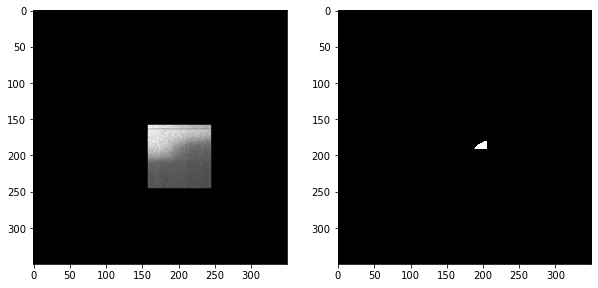

batch 97
1: pred_dist: [2.21394]


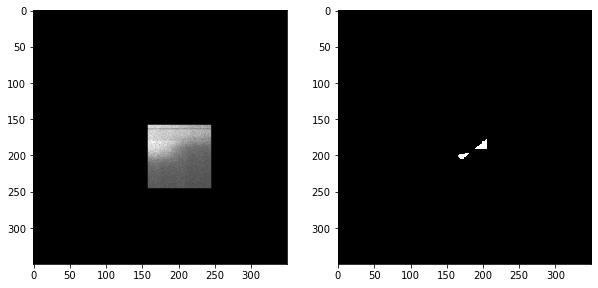

batch 98
1: pred_dist: [2.1849911]


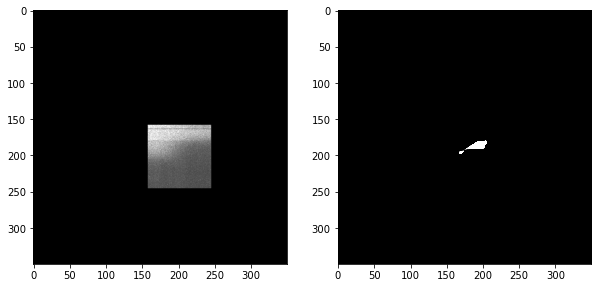

batch 99
1: pred_dist: [2.2076595]


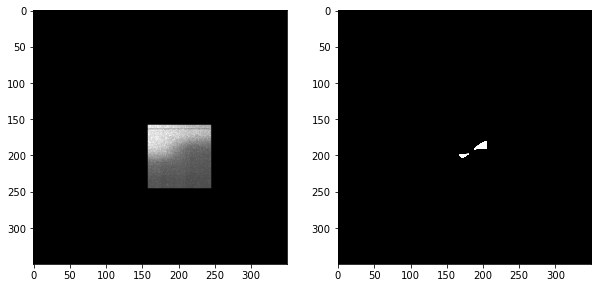

batch 100
1: pred_dist: [2.2252045]


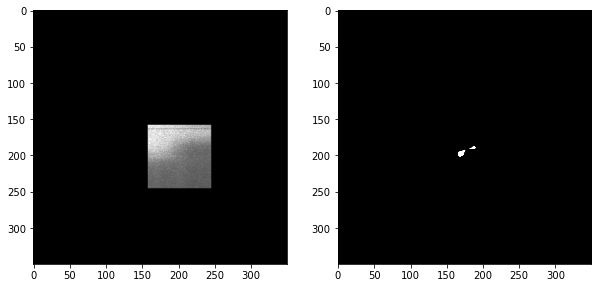

batch 101
1: pred_dist: [2.1647494]


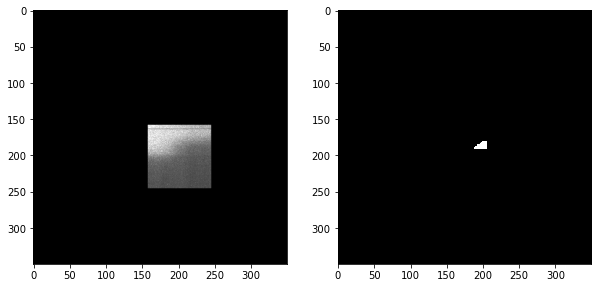

batch 102
1: pred_dist: [2.2223895]


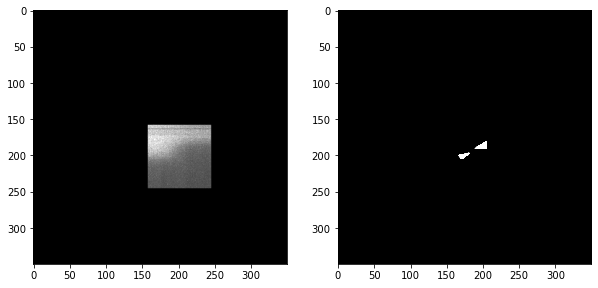

batch 103
1: pred_dist: [2.1874173]


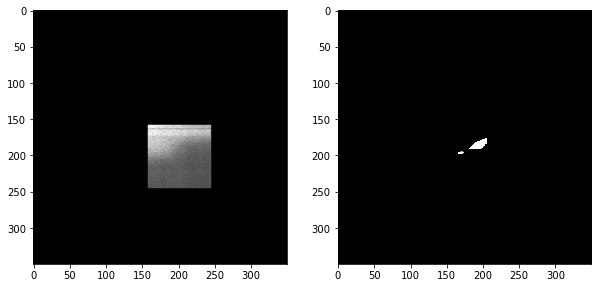

batch 104
1: pred_dist: [2.1963038]


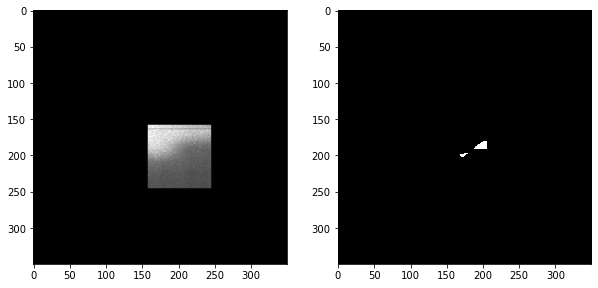

batch 105
1: pred_dist: [2.2262278]


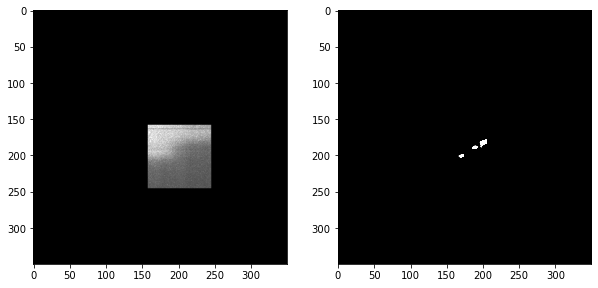

batch 106
1: pred_dist: [2.173534]


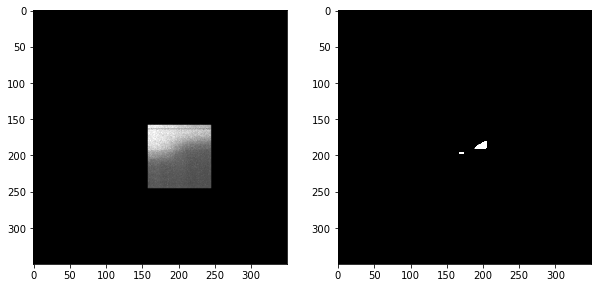

batch 107
1: pred_dist: [2.2215168]


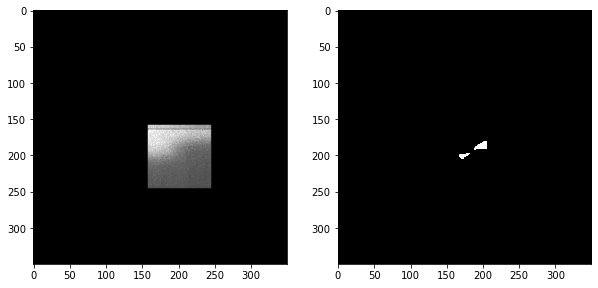

batch 108
1: pred_dist: [2.1928678]


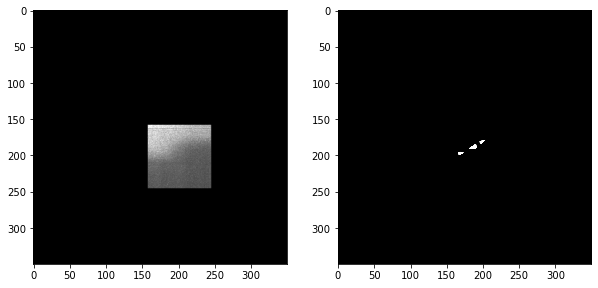

batch 109
1: pred_dist: [2.1827033]


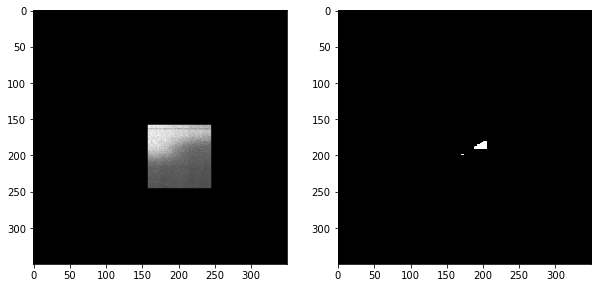

batch 110
1: pred_dist: [2.2098038]


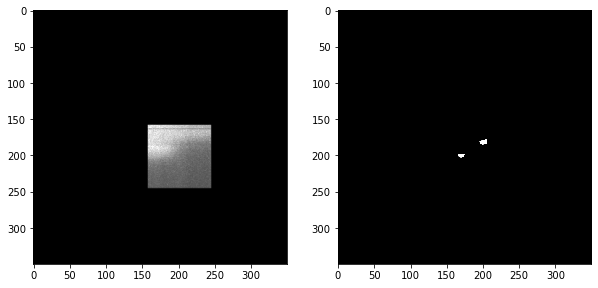

batch 111
1: pred_dist: [2.190117]


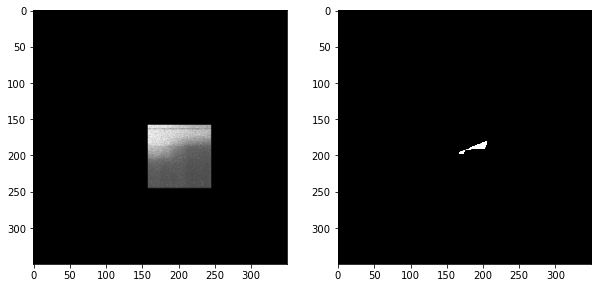

batch 112
1: pred_dist: [2.2120826]


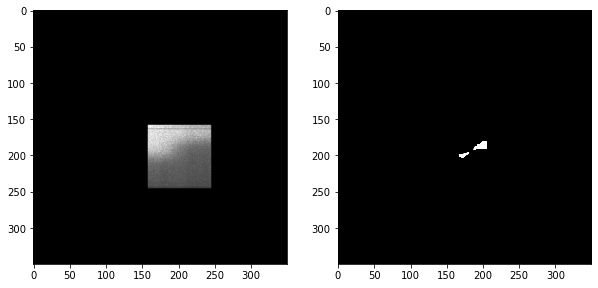

batch 113
1: pred_dist: [2.2110698]


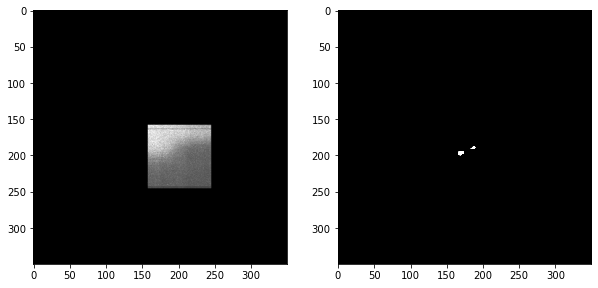

batch 114
1: pred_dist: [2.172941]


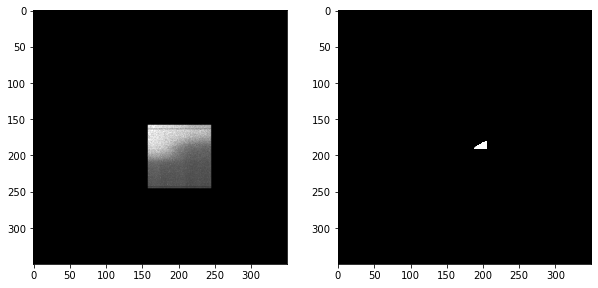

batch 115
1: pred_dist: [2.2054002]


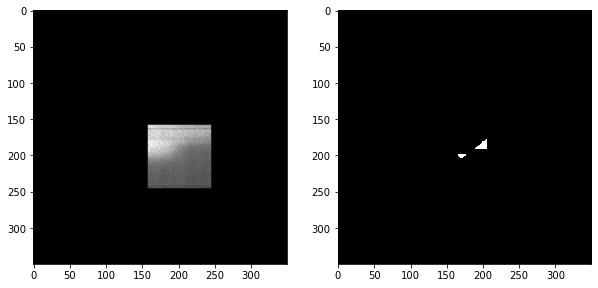

batch 116
1: pred_dist: [2.1902204]


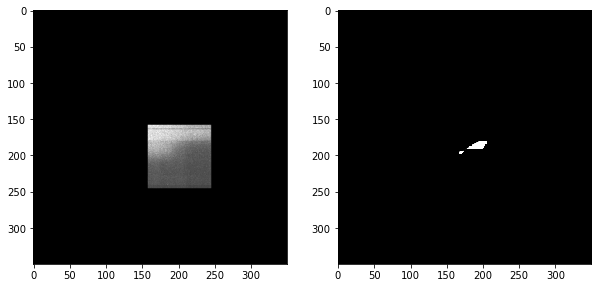

batch 117
1: pred_dist: [2.2057338]


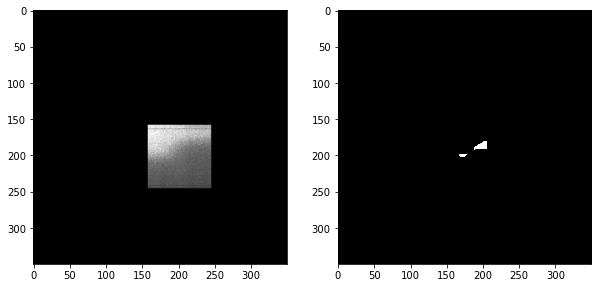

batch 118
1: pred_dist: [2.217447]


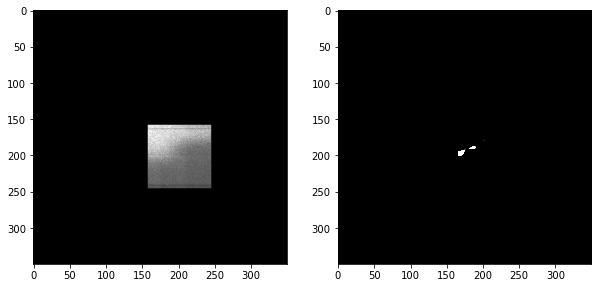

batch 119
1: pred_dist: [2.1697938]


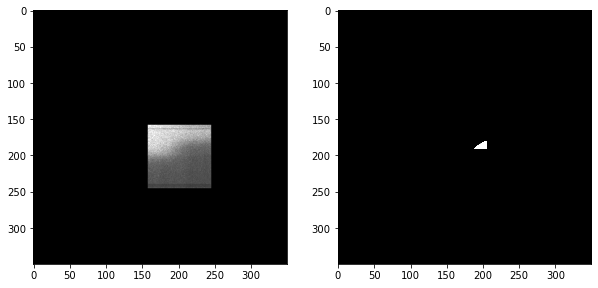

batch 120
1: pred_dist: [2.2103415]


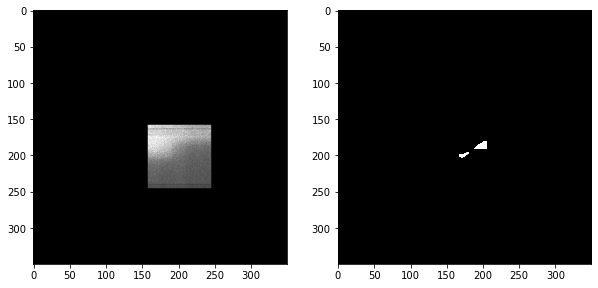

batch 121
1: pred_dist: [2.1812983]


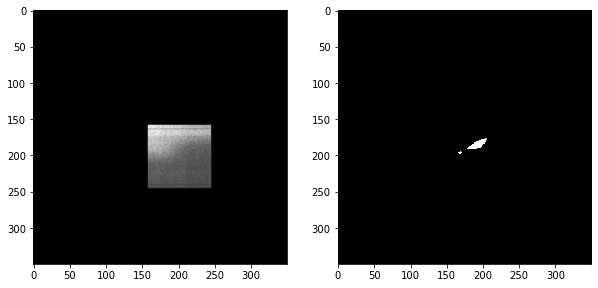

batch 122
1: pred_dist: [2.1995032]


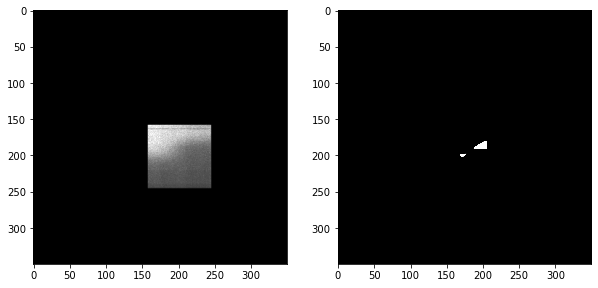

batch 123
1: pred_dist: [2.2195725]


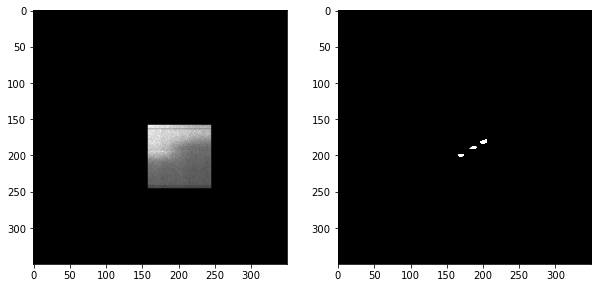

batch 124
1: pred_dist: [2.1725724]


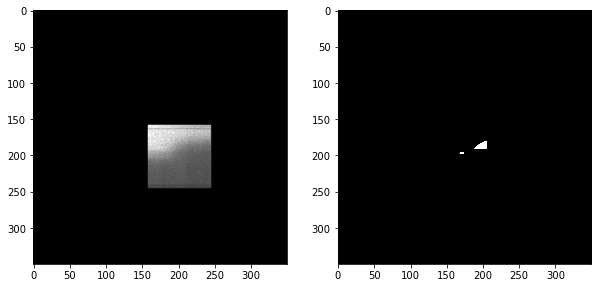

batch 125
1: pred_dist: [2.2164]


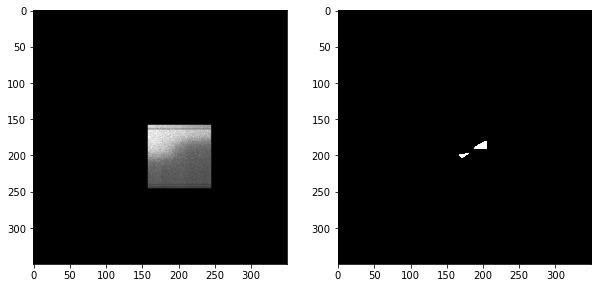

batch 126
1: pred_dist: [2.194118]


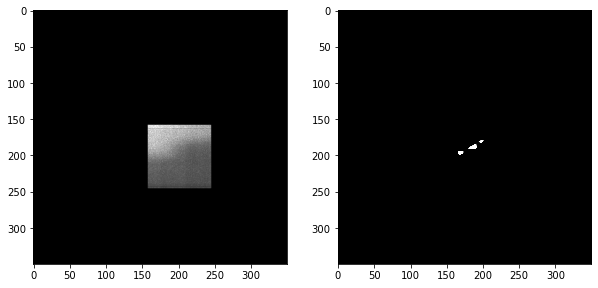

batch 127
1: pred_dist: [2.1846335]


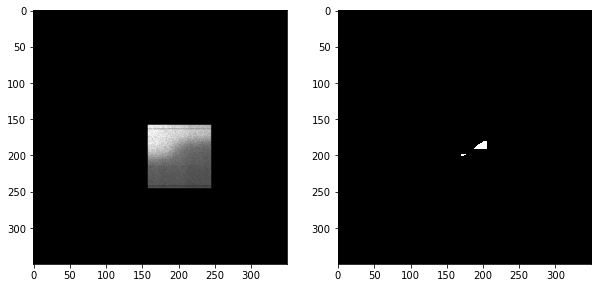

batch 128
1: pred_dist: [2.2082908]


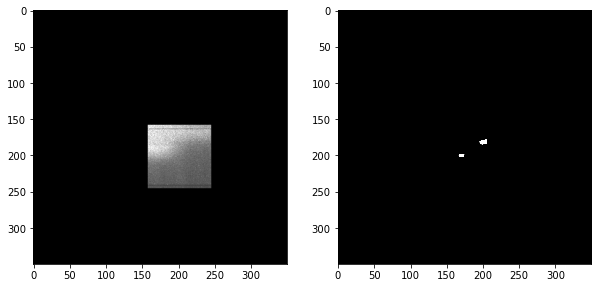

batch 129
1: pred_dist: [2.1860762]


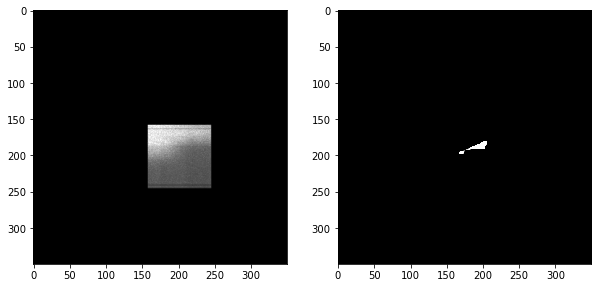

batch 130
1: pred_dist: [2.2084668]


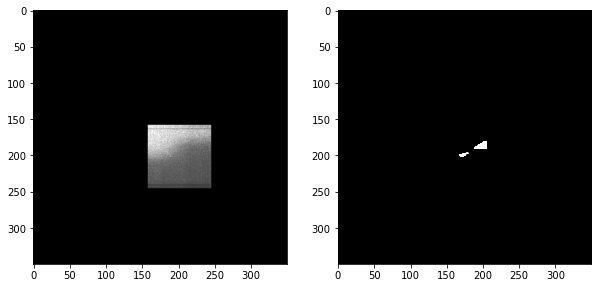

batch 131
1: pred_dist: [2.2100694]


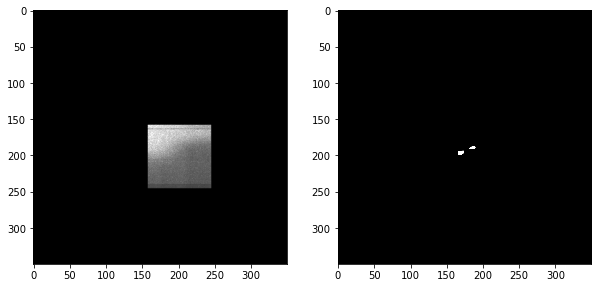

batch 132
1: pred_dist: [2.1677308]


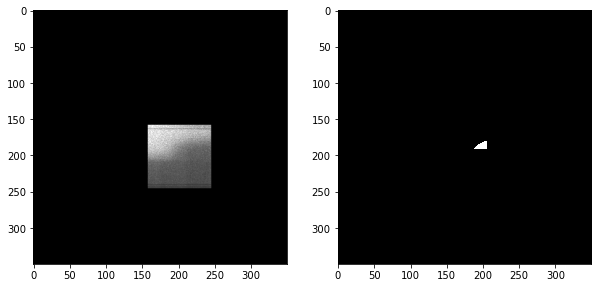

batch 133
1: pred_dist: [2.1997247]


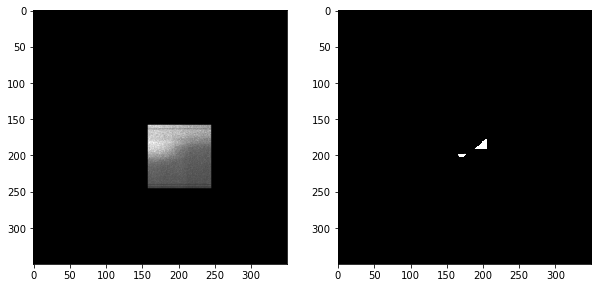

batch 134
1: pred_dist: [2.192234]


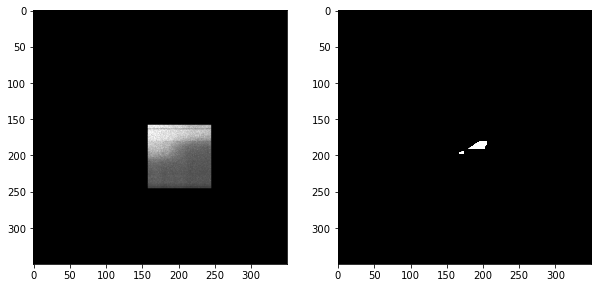

batch 135
1: pred_dist: [2.2044666]


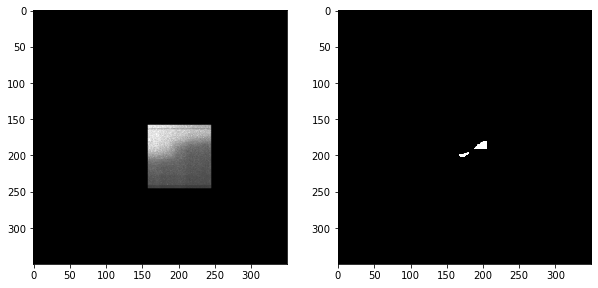

batch 136
1: pred_dist: [2.2255452]


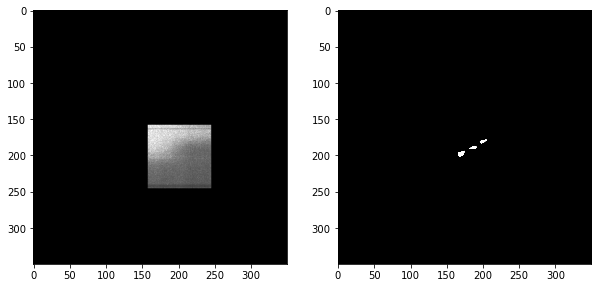

batch 137
1: pred_dist: [2.1657977]


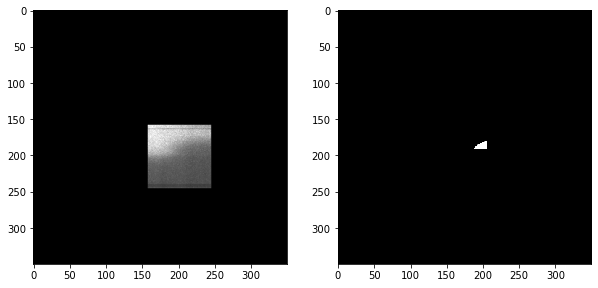

batch 138
1: pred_dist: [2.2136376]


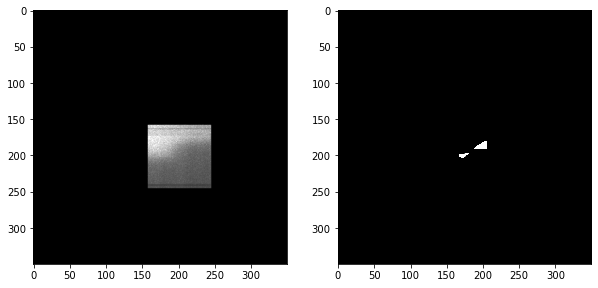

batch 139
1: pred_dist: [2.1866605]


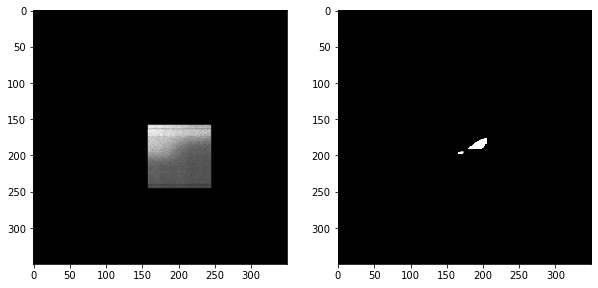

batch 140
1: pred_dist: [2.1977854]


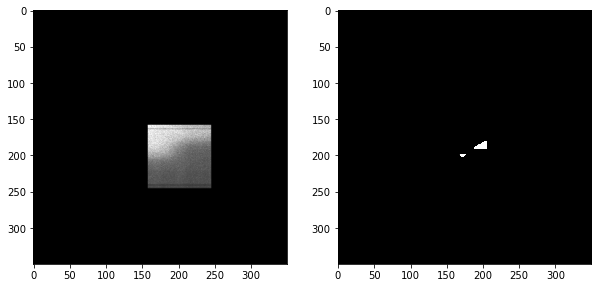

batch 141
1: pred_dist: [2.2173643]


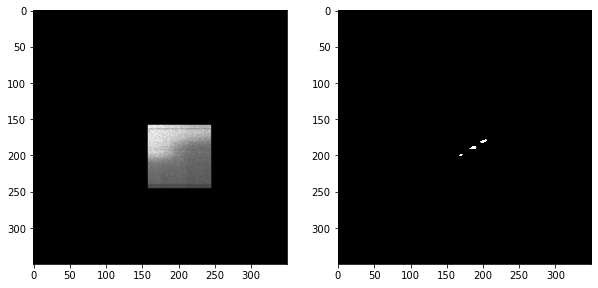

batch 142
1: pred_dist: [2.1705415]


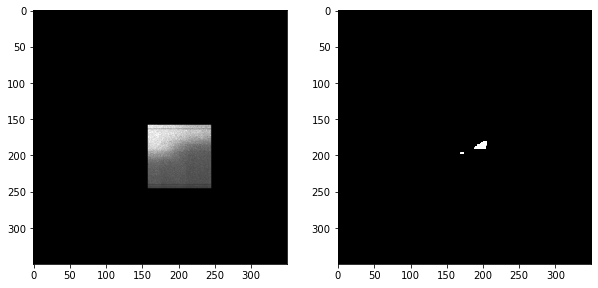

batch 143
1: pred_dist: [2.2234888]


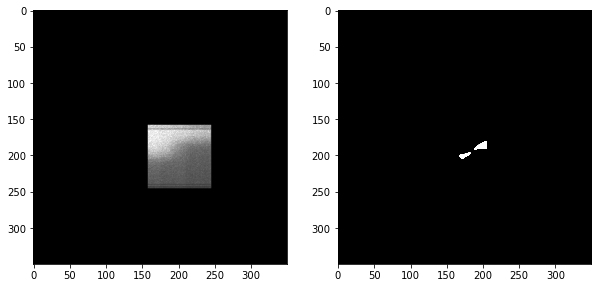

batch 144
1: pred_dist: [2.1962419]


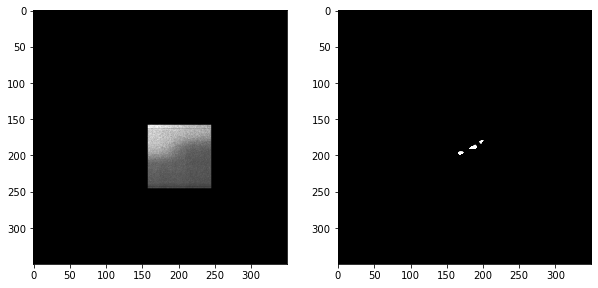

batch 145
1: pred_dist: [2.1831474]


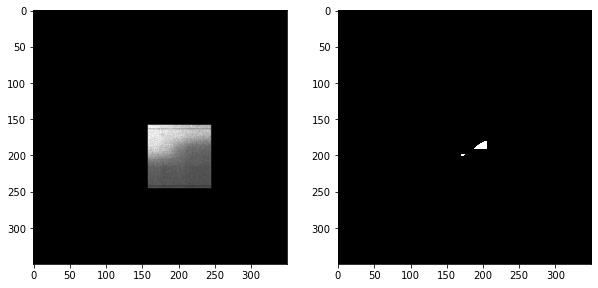

batch 146
1: pred_dist: [2.2095873]


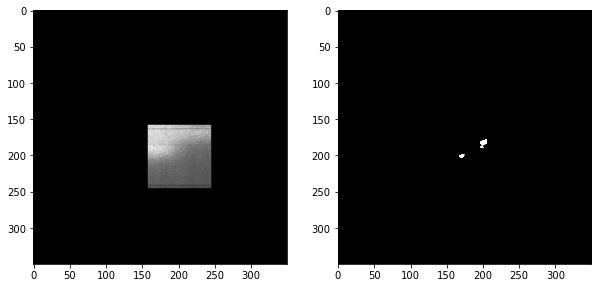

batch 147
1: pred_dist: [2.1836302]


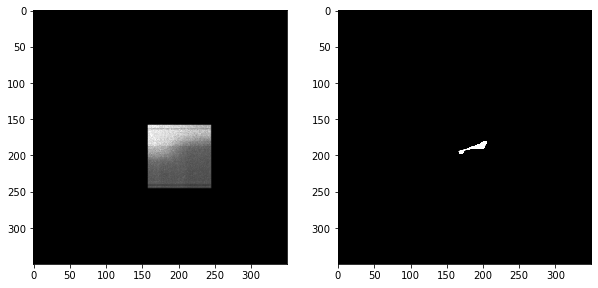

batch 148
1: pred_dist: [2.2098513]


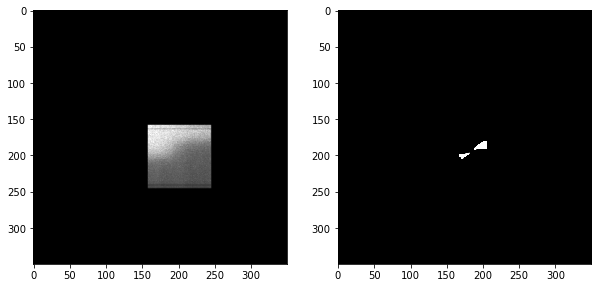

batch 149
1: pred_dist: [2.2155373]


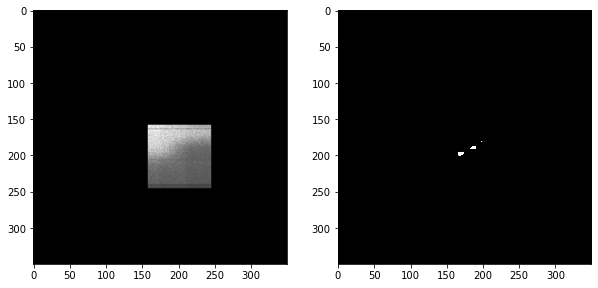

batch 150
1: pred_dist: [2.1706579]


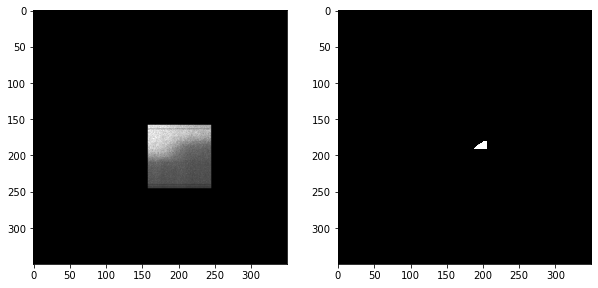

batch 151
1: pred_dist: [2.2062843]


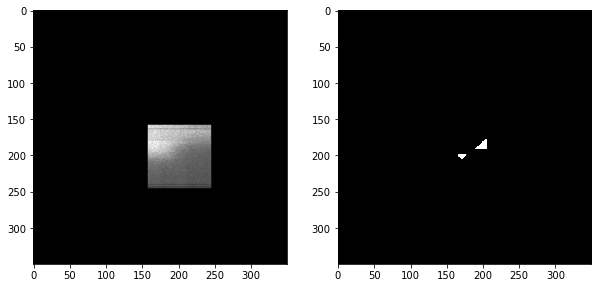

batch 152
1: pred_dist: [2.1915462]


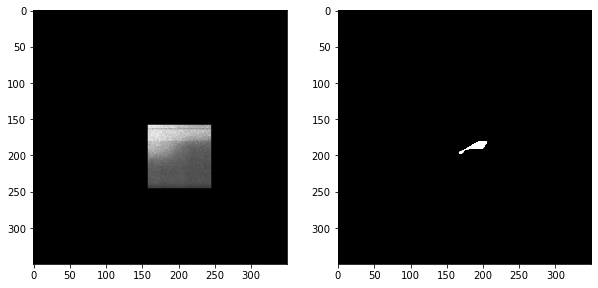

batch 153
1: pred_dist: [2.2043436]


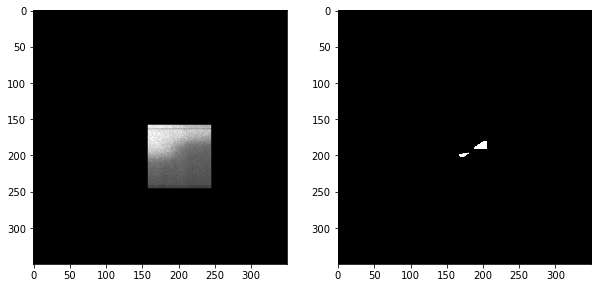

batch 154
1: pred_dist: [2.2232082]


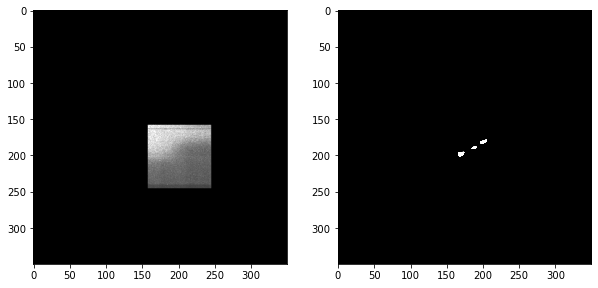

batch 155
1: pred_dist: [2.1675177]


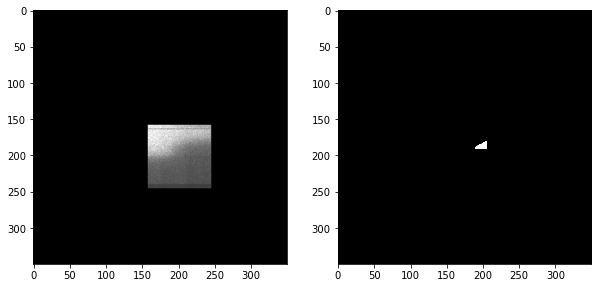

batch 156
1: pred_dist: [2.2174547]


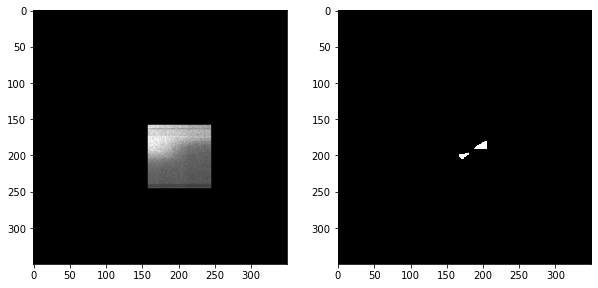

batch 157
1: pred_dist: [2.185792]


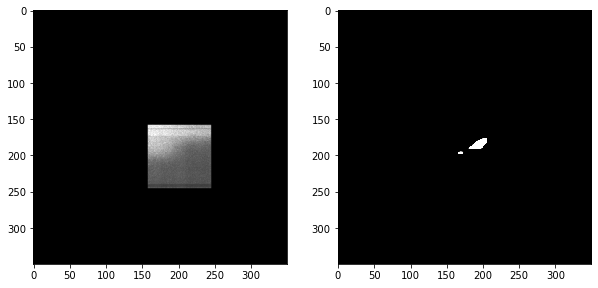

batch 158
1: pred_dist: [2.194774]


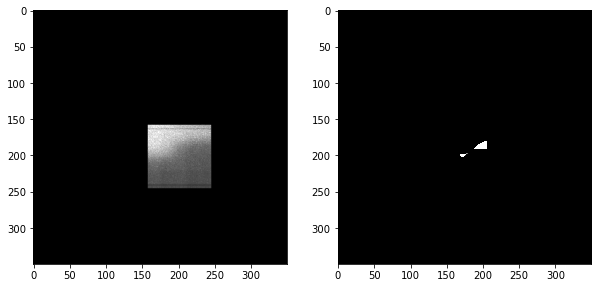

batch 159
1: pred_dist: [2.2191832]


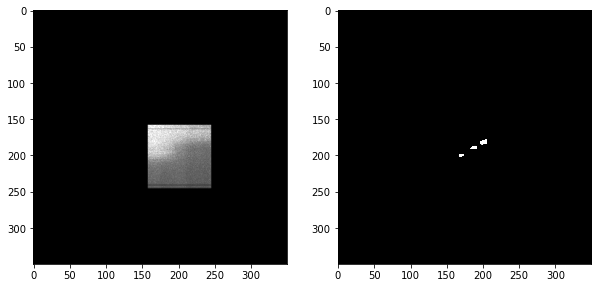

batch 160
1: pred_dist: [2.174917]


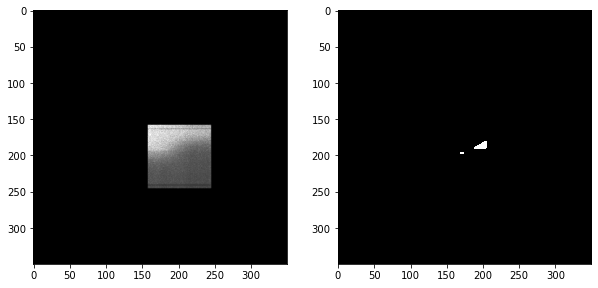

batch 161
1: pred_dist: [2.2137132]


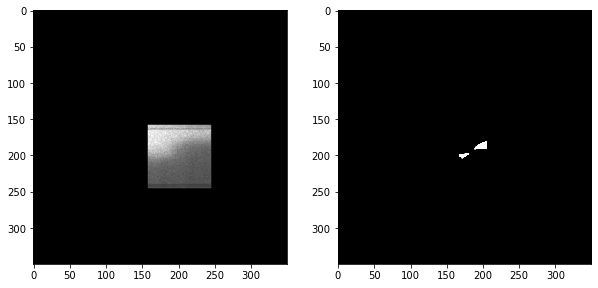

batch 162
1: pred_dist: [2.1980803]


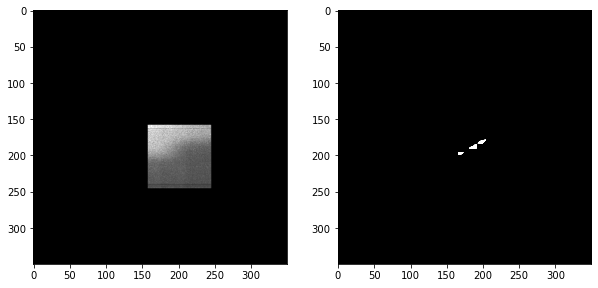

batch 163
1: pred_dist: [2.1833239]


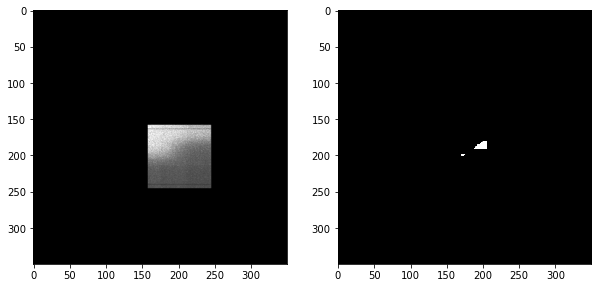

batch 164
1: pred_dist: [2.213708]


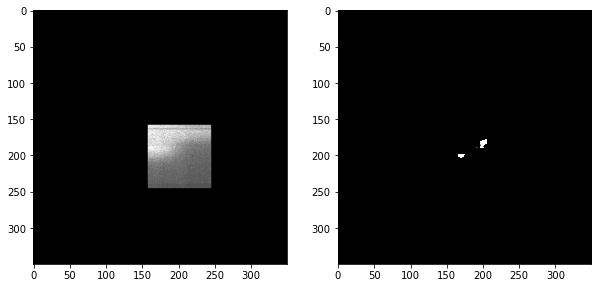

batch 165
1: pred_dist: [2.1849315]


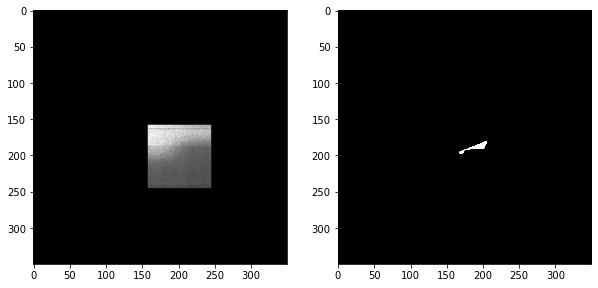

batch 166
1: pred_dist: [2.2110295]


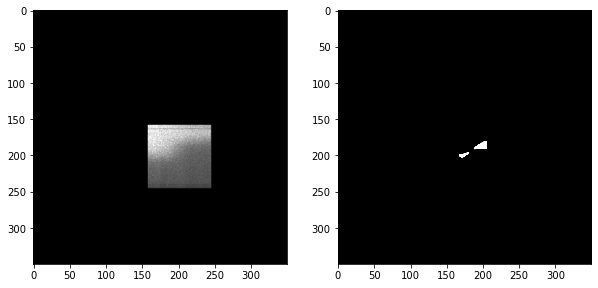

batch 167
1: pred_dist: [2.2113197]


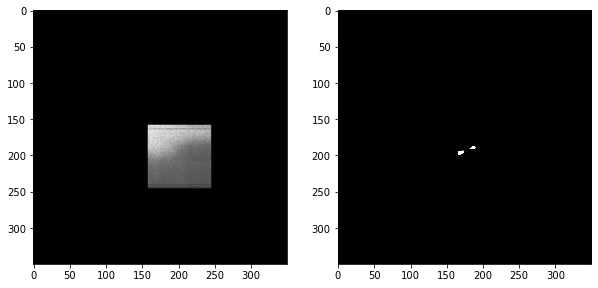

batch 168
1: pred_dist: [2.1743288]


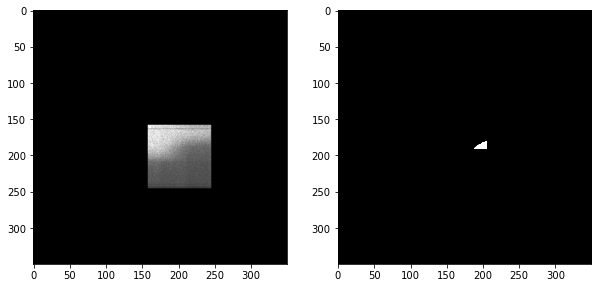

batch 169
1: pred_dist: [2.2075174]


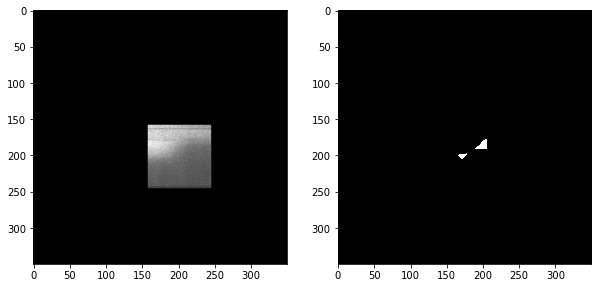

batch 170
1: pred_dist: [2.1886835]


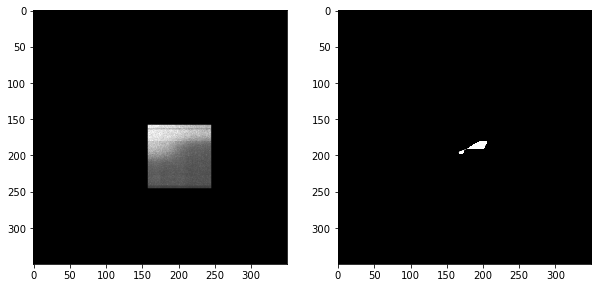

batch 171
1: pred_dist: [2.204604]


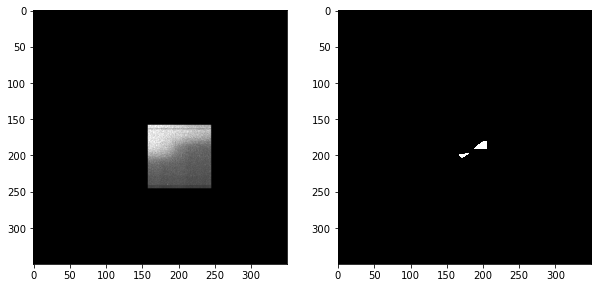

batch 172
1: pred_dist: [2.222172]


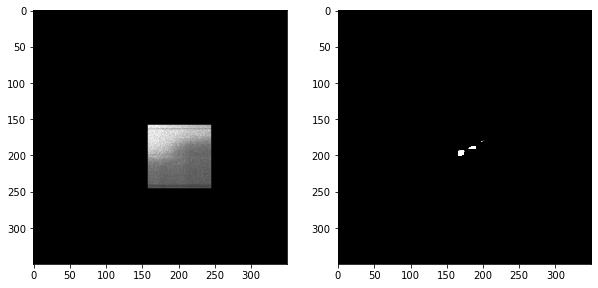

batch 173
1: pred_dist: [2.1671493]


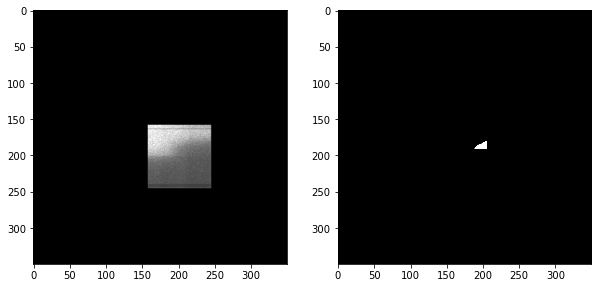

batch 174
1: pred_dist: [2.2167518]


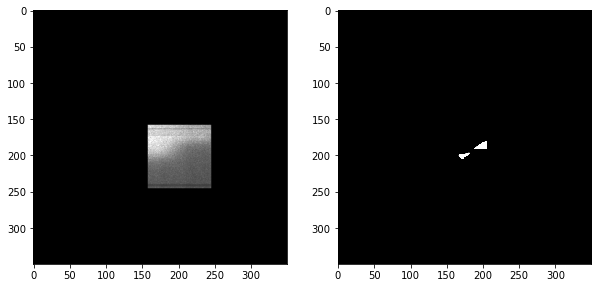

batch 175
1: pred_dist: [2.1818273]


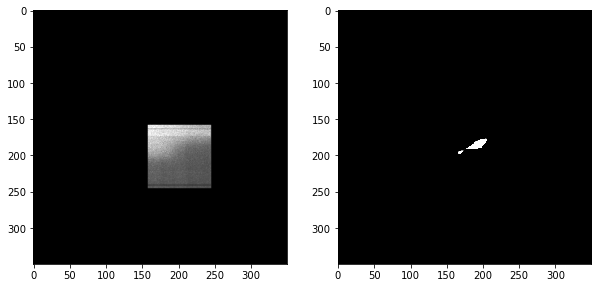

batch 176
1: pred_dist: [2.1940584]


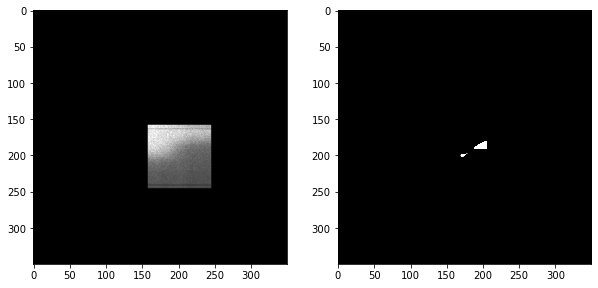

batch 177
1: pred_dist: [2.2146366]


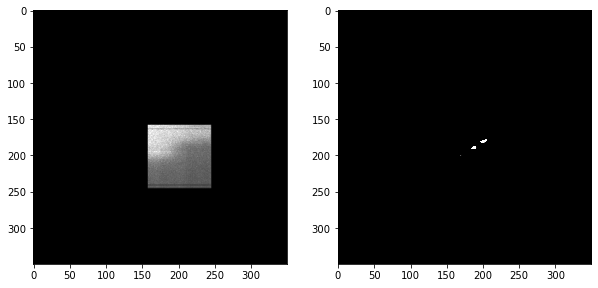

batch 178
1: pred_dist: [2.1686985]


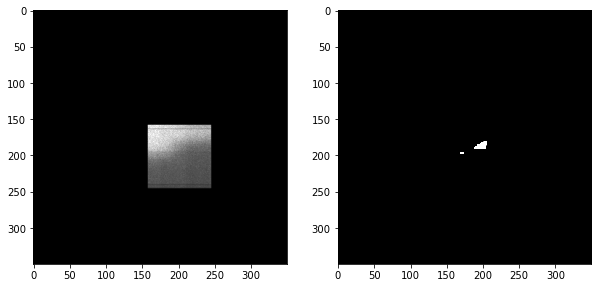

batch 179
1: pred_dist: [2.2200992]


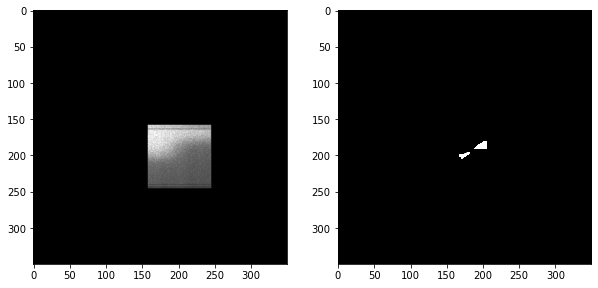

batch 180
1: pred_dist: [2.1941755]


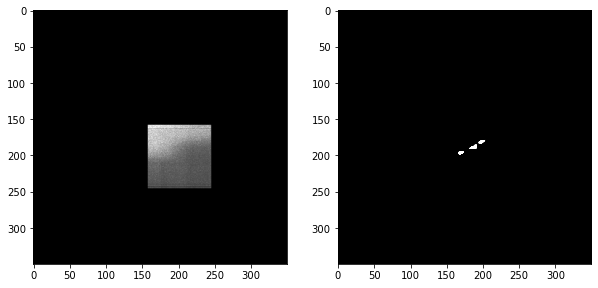

batch 181
1: pred_dist: [2.1852167]


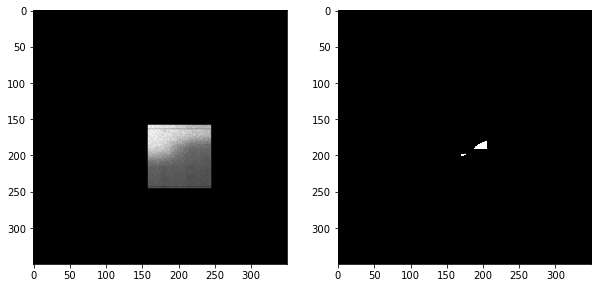

batch 182
1: pred_dist: [2.2074287]


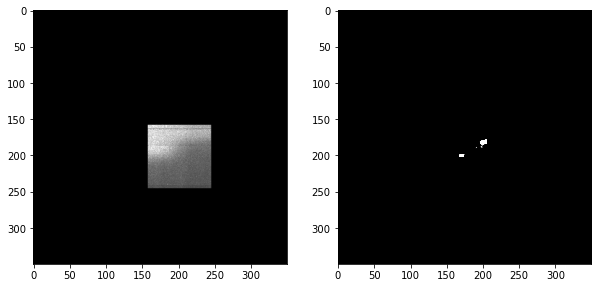

batch 183
1: pred_dist: [2.1876876]


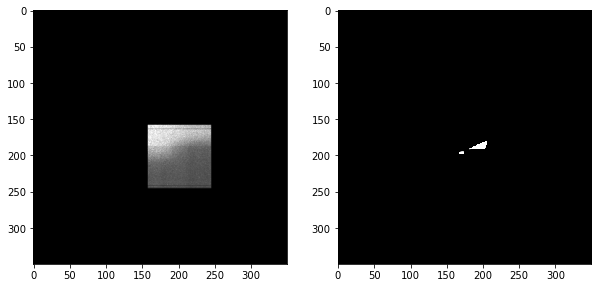

batch 184
1: pred_dist: [2.2147517]


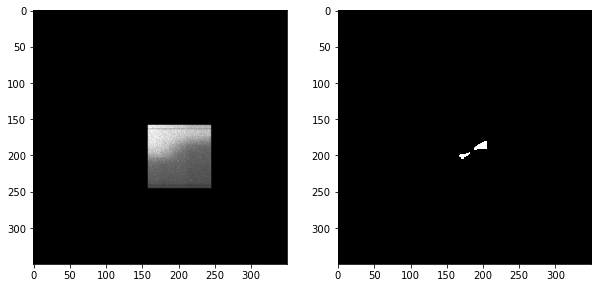

batch 185
1: pred_dist: [2.2070434]


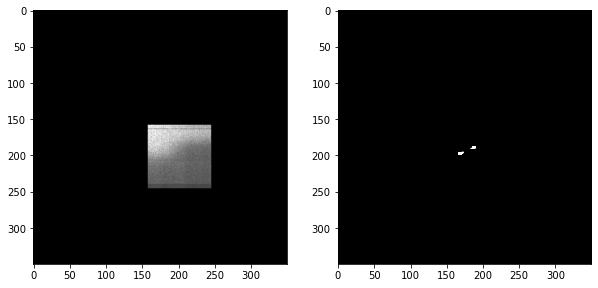

batch 186
1: pred_dist: [2.1692276]


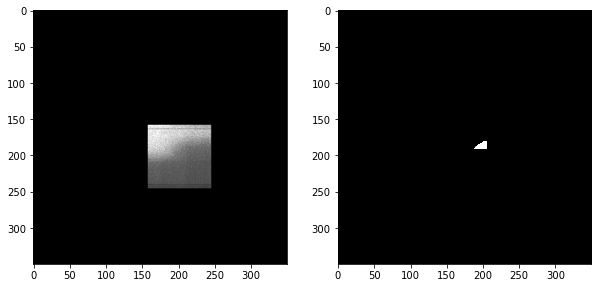

batch 187
1: pred_dist: [2.1998127]


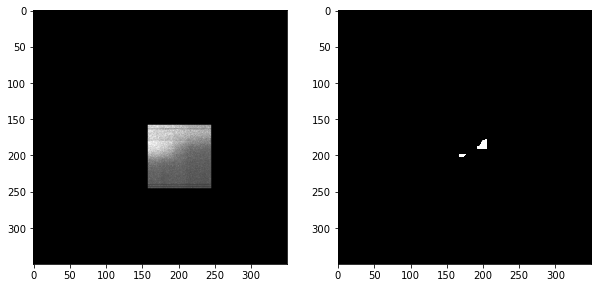

batch 188
1: pred_dist: [2.1916678]


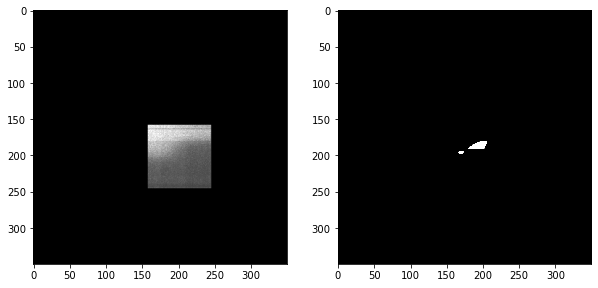

batch 189
1: pred_dist: [2.2077684]


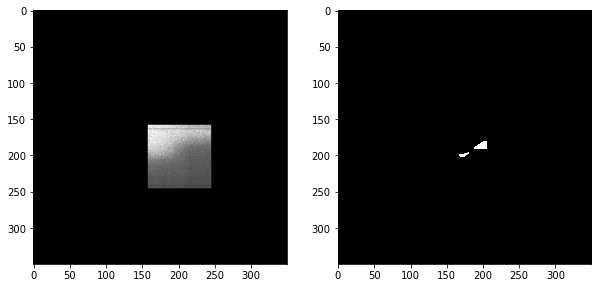

batch 190
1: pred_dist: [2.2264946]


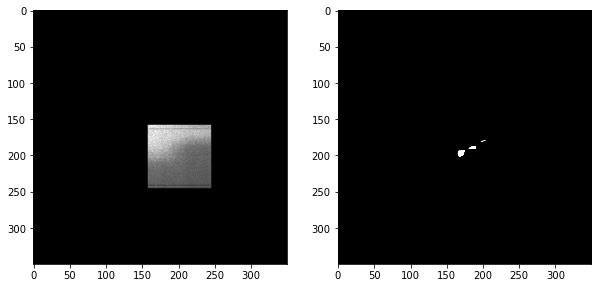

batch 191
1: pred_dist: [2.1682627]


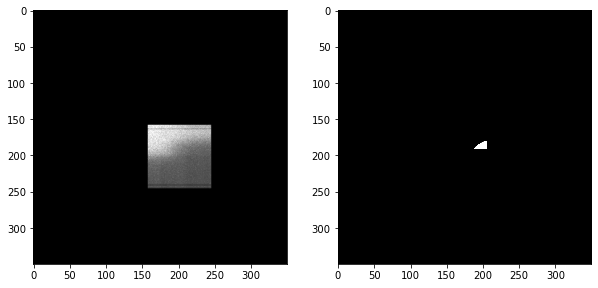

batch 192
1: pred_dist: [2.2167108]


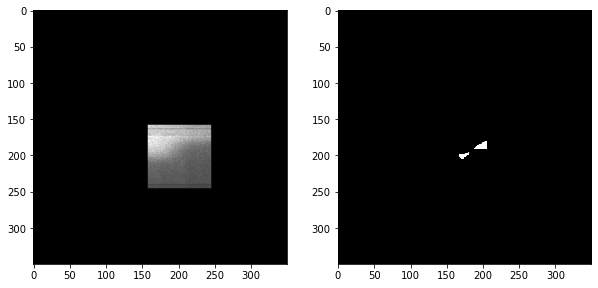

batch 193
1: pred_dist: [2.184791]


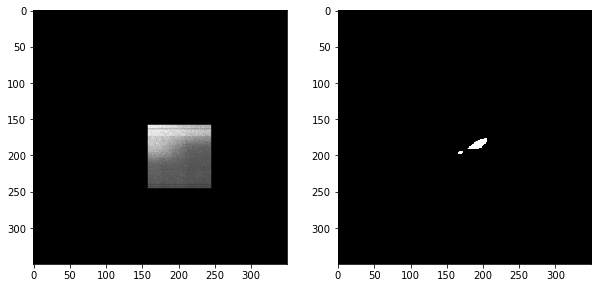

batch 194
1: pred_dist: [2.1997843]


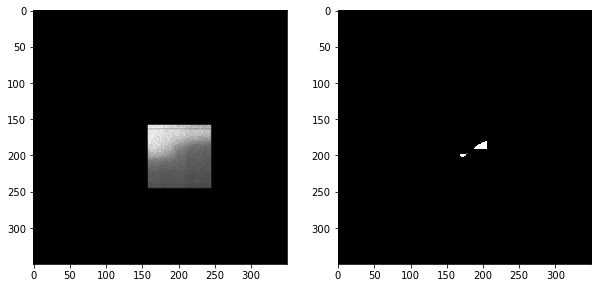

batch 195
1: pred_dist: [2.2232864]


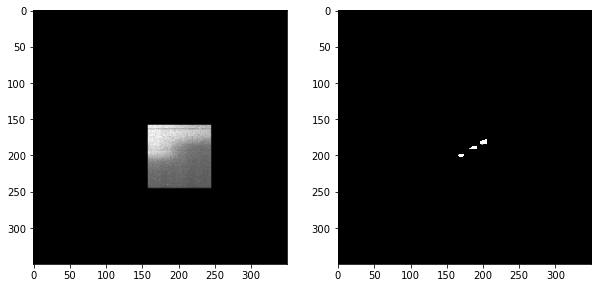

batch 196
1: pred_dist: [2.1759298]


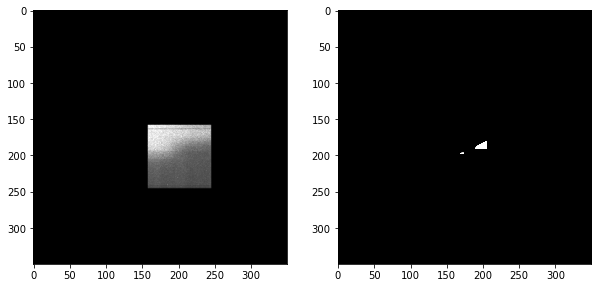

batch 197
1: pred_dist: [2.2226586]


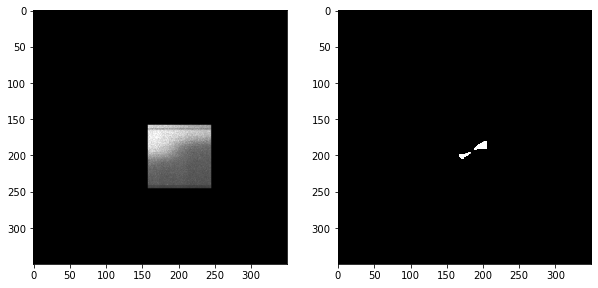

batch 198
1: pred_dist: [2.1914475]


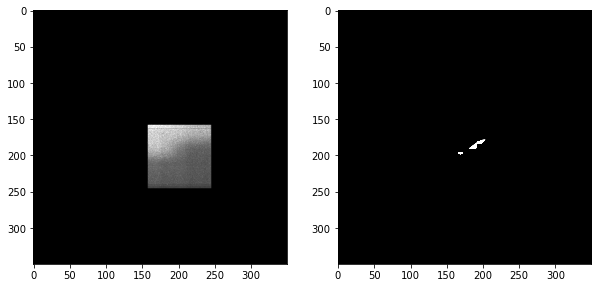

batch 199
1: pred_dist: [2.1843083]


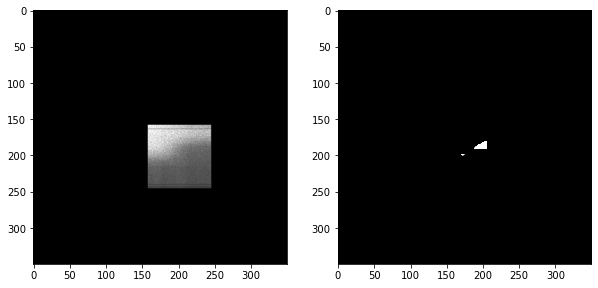

batch 200
1: pred_dist: [2.205604]


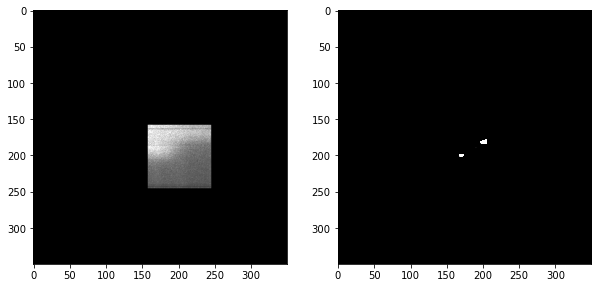

batch 201
1: pred_dist: [2.1830614]


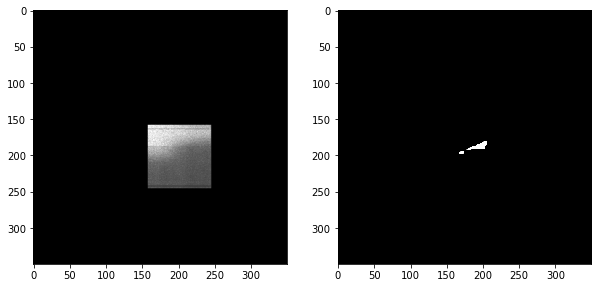

In [17]:
for i, batch in tqdm(enumerate(data_loaders), total=data_lengths, desc="Batch"):

    true_images= batch["image"]
    pred_masks, pred_dists = model(true_images.float().to(device))
    print("batch {}".format(i + 1))
    for j, (img, pr_msk, pr_dist) in enumerate(zip(true_images, pred_masks.cpu().detach().numpy(),
                                                                    pred_dists.cpu().detach().numpy())):
        print("{}: pred_dist: {}".format(j + 1, pr_dist))

        f = plt.figure(figsize=(10, 5))
        f.add_subplot(1, 2, 1)
        plt.imshow(img[0, ...], cmap='gray')
        f.add_subplot(1, 2, 2)
        plt.imshow(pr_msk[0, ...], cmap='gray')
        plt.show(block=True)
        
    #if i ==1:
    #    break

In [16]:
pos1_top_right_1_inv = os.path.join(root_folder_pos1, 'top_right_1_inv')

In [18]:
data_loaders, data_lengths = define_dataset(root_folder=pos1_top_right_1_inv,
                                           fname_key='File', alldata=True,
                                           batch_size=1, load_mask=False,
                                           row_slice=slice(0,1400),
                                           col_slice=slice(1000,None))

batch 1
1: pred_dist: [2.2170446]


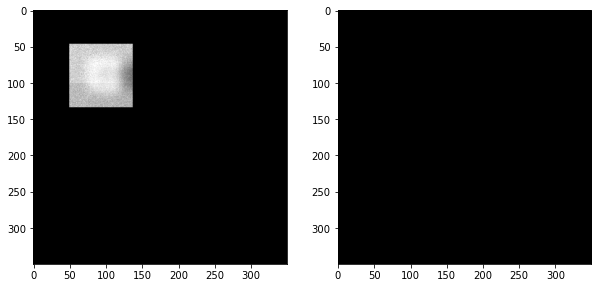

batch 2
1: pred_dist: [2.2094064]


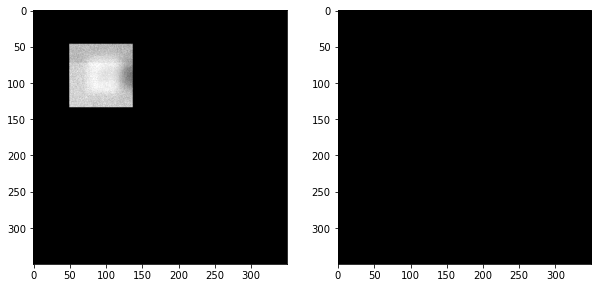

batch 3
1: pred_dist: [2.2135255]


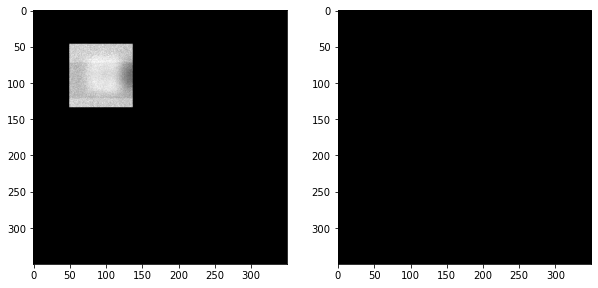

batch 4
1: pred_dist: [2.2184336]


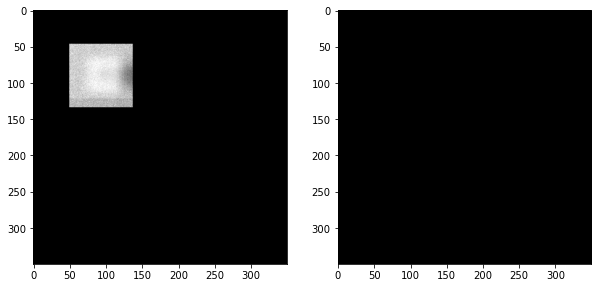

batch 5
1: pred_dist: [2.2029297]


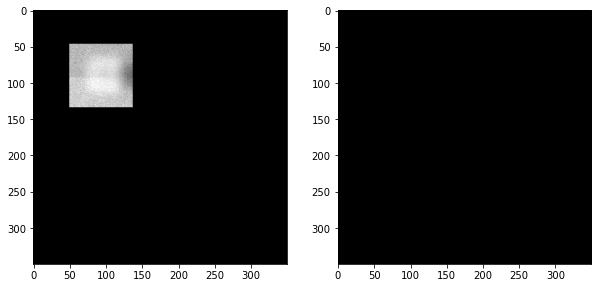

batch 6
1: pred_dist: [2.2171292]


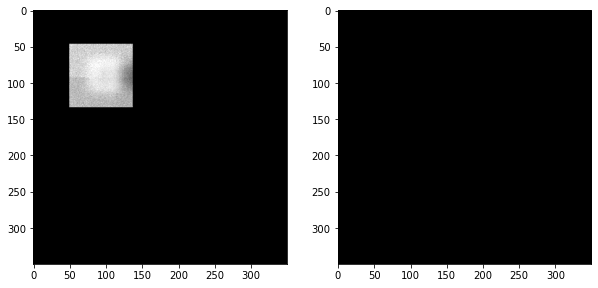

batch 7
1: pred_dist: [2.2107928]


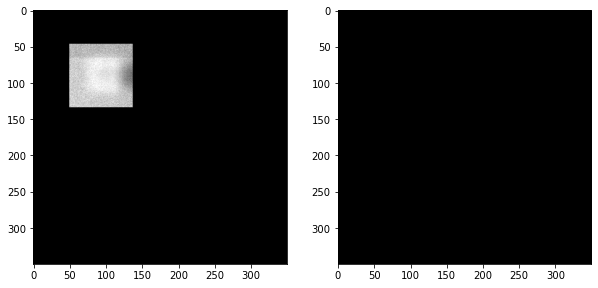

batch 8
1: pred_dist: [2.212003]


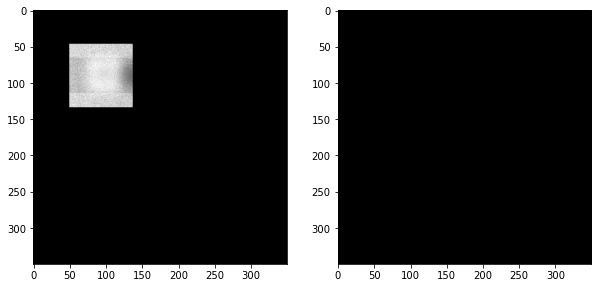

batch 9
1: pred_dist: [2.218475]


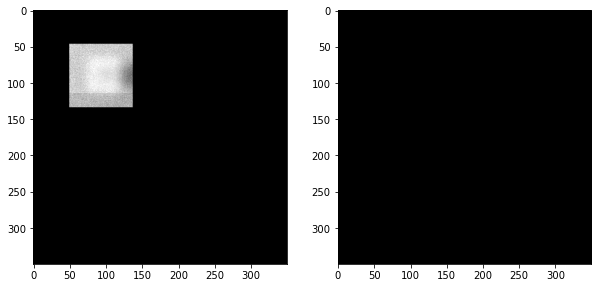

batch 10
1: pred_dist: [2.2051258]


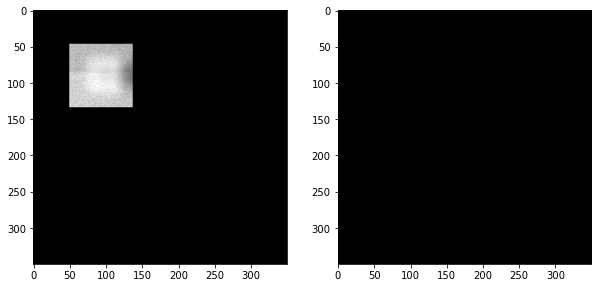

batch 11
1: pred_dist: [2.2166815]


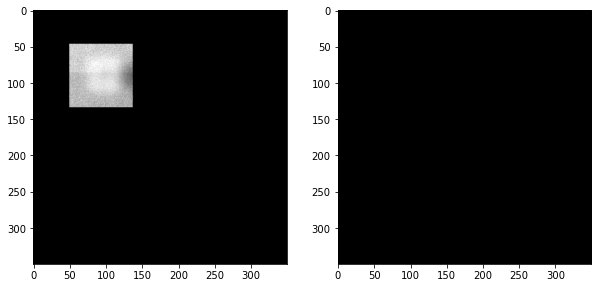

batch 12
1: pred_dist: [2.2140188]


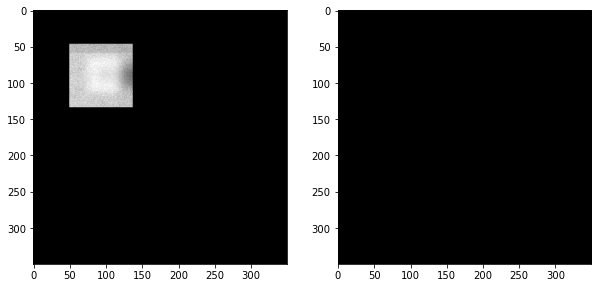

batch 13
1: pred_dist: [2.2067146]


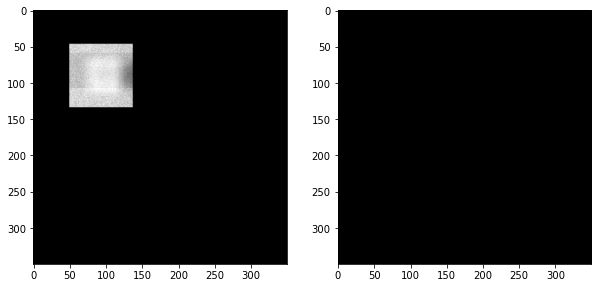

batch 14
1: pred_dist: [2.2171862]


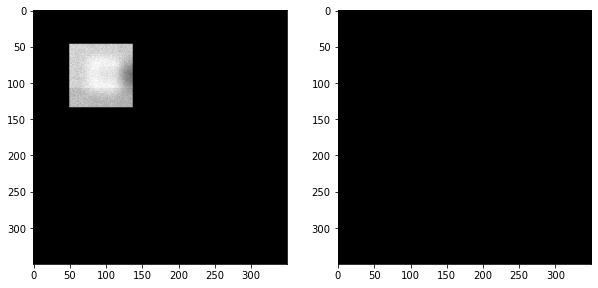

batch 15
1: pred_dist: [2.205588]


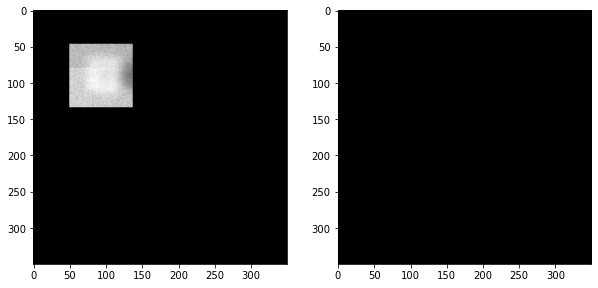

batch 16
1: pred_dist: [2.2154896]


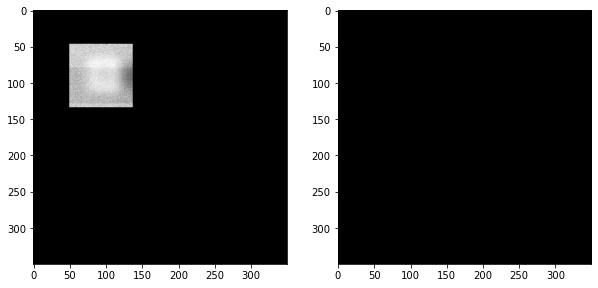

batch 17
1: pred_dist: [2.2156577]


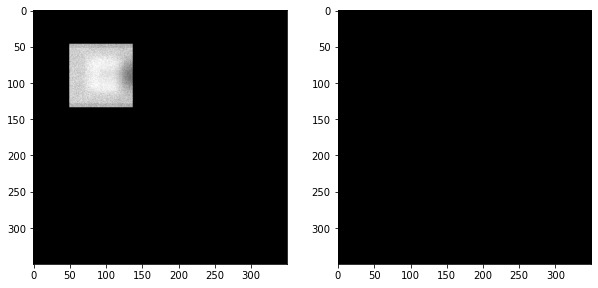

batch 18
1: pred_dist: [2.2041087]


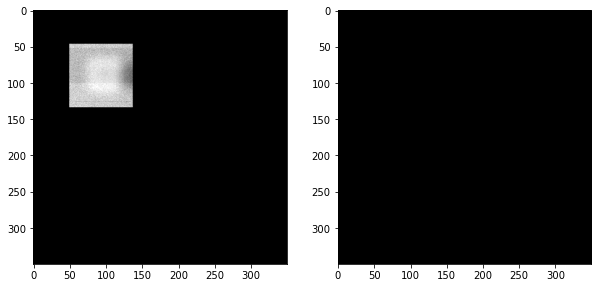

batch 19
1: pred_dist: [2.2180514]


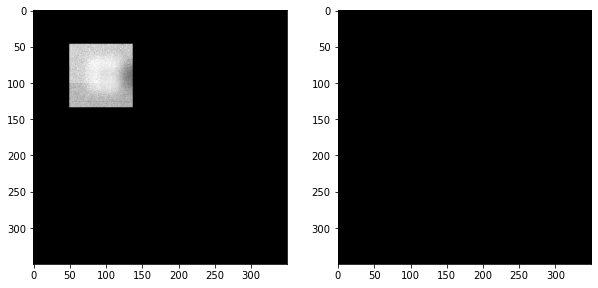

batch 20
1: pred_dist: [2.2079391]


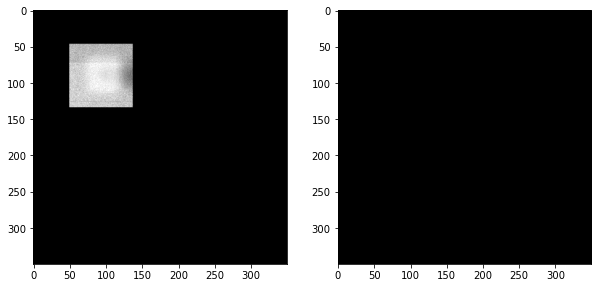

batch 21
1: pred_dist: [2.21384]


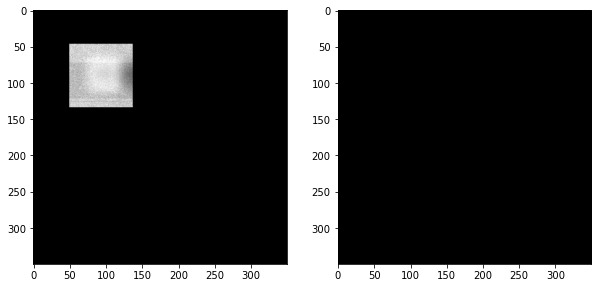

batch 22
1: pred_dist: [2.2185547]


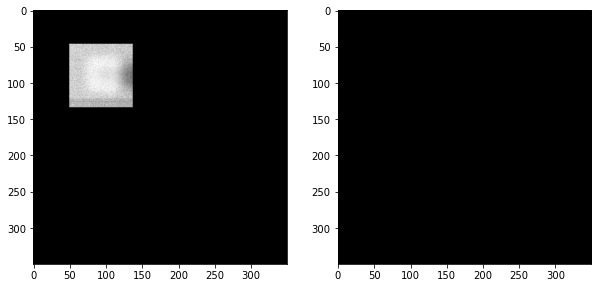

batch 23
1: pred_dist: [2.2036152]


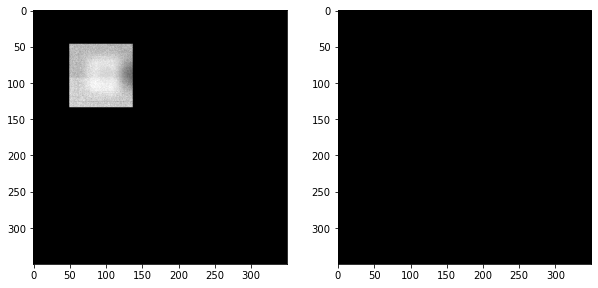

batch 24
1: pred_dist: [2.2173414]


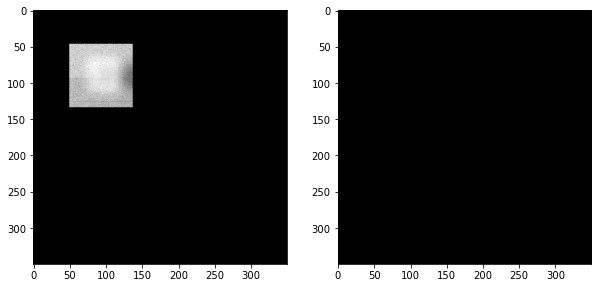

batch 25
1: pred_dist: [2.2113662]


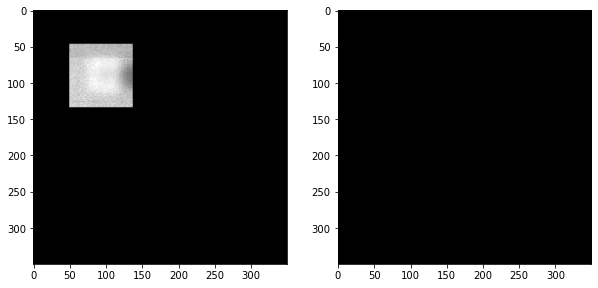

batch 26
1: pred_dist: [2.210766]


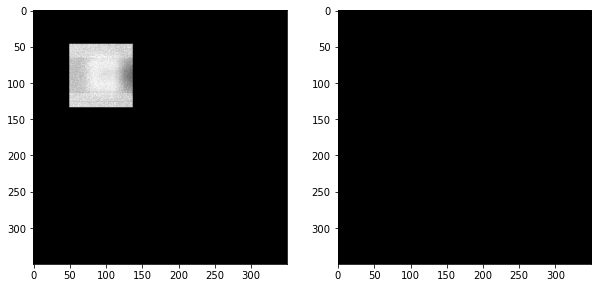

batch 27
1: pred_dist: [2.2175858]


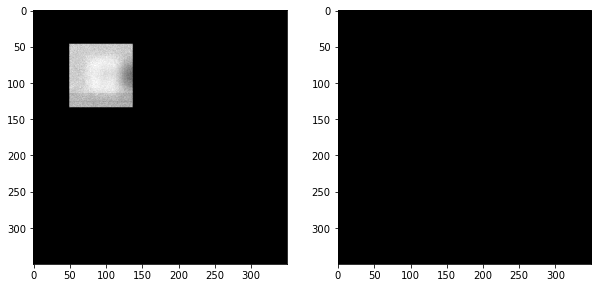

batch 28
1: pred_dist: [2.203063]


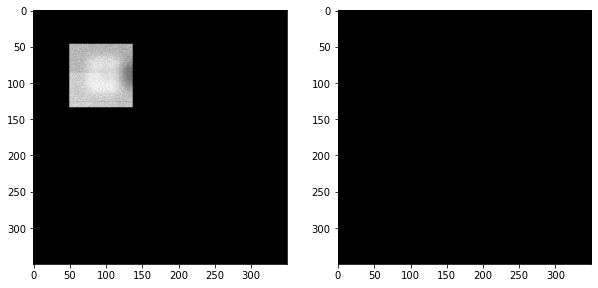

batch 29
1: pred_dist: [2.2159553]


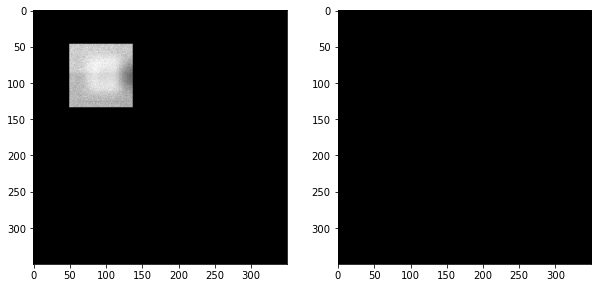

batch 30
1: pred_dist: [2.2138743]


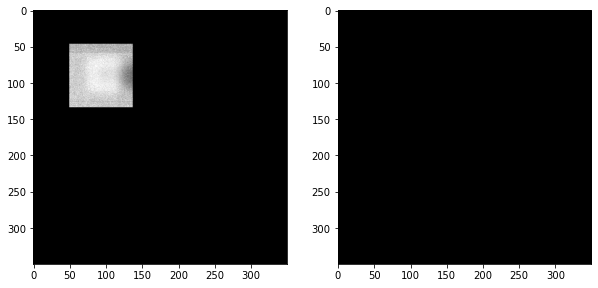

batch 31
1: pred_dist: [2.2081273]


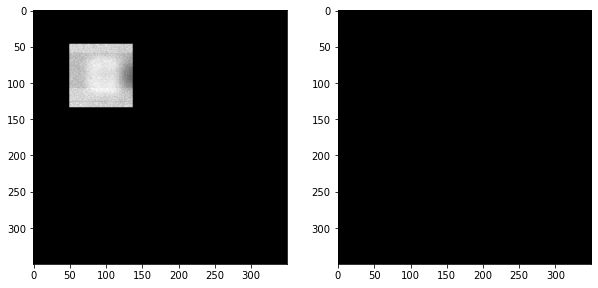

batch 32
1: pred_dist: [2.2171323]


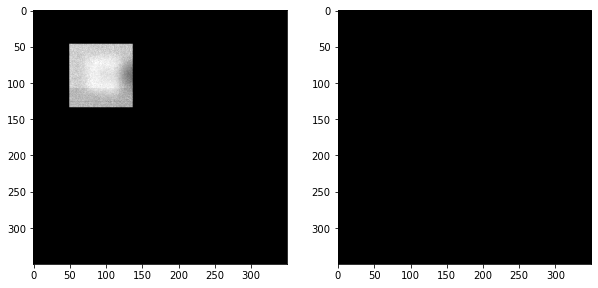

batch 33
1: pred_dist: [2.2066114]


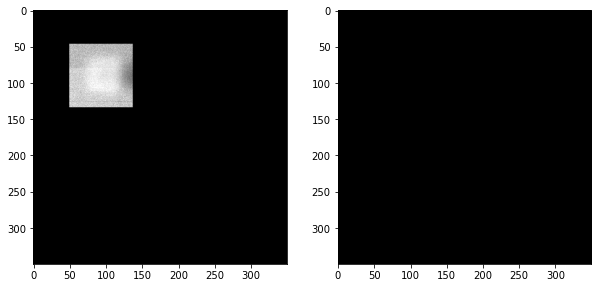

batch 34
1: pred_dist: [2.2144551]


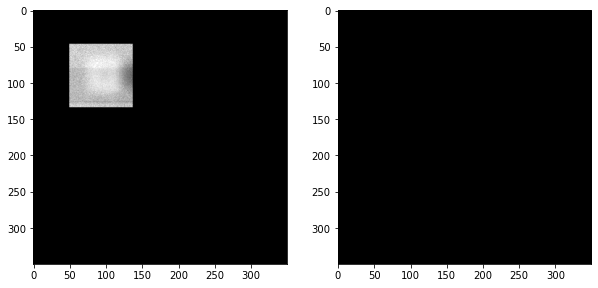

batch 35
1: pred_dist: [2.2158892]


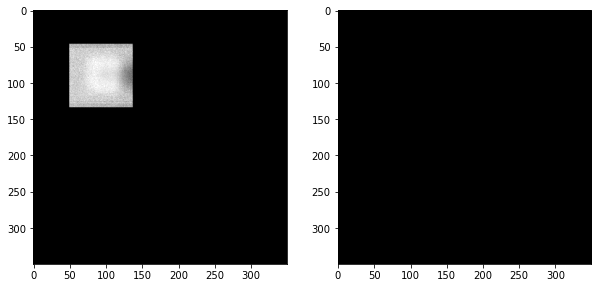

batch 36
1: pred_dist: [2.20379]


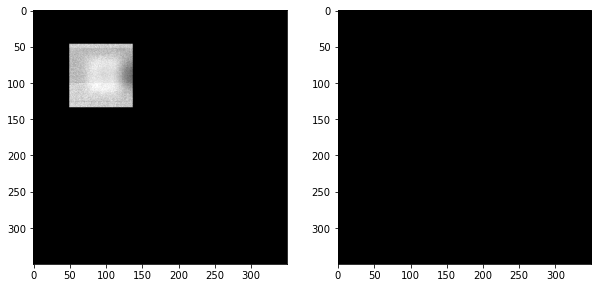

batch 37
1: pred_dist: [2.2183506]


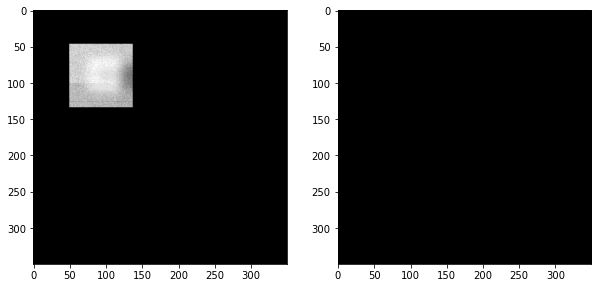

batch 38
1: pred_dist: [2.2083762]


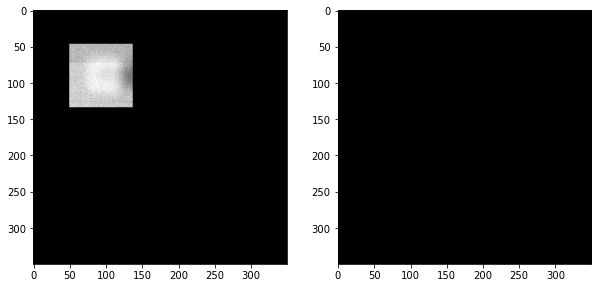

batch 39
1: pred_dist: [2.2136915]


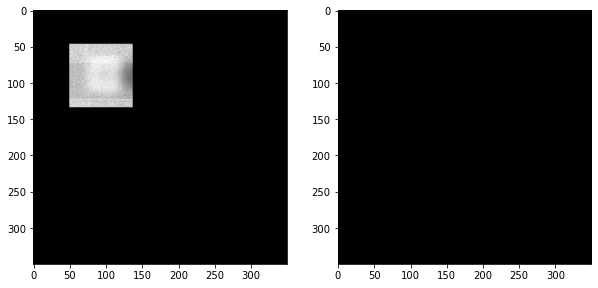

batch 40
1: pred_dist: [2.2184184]


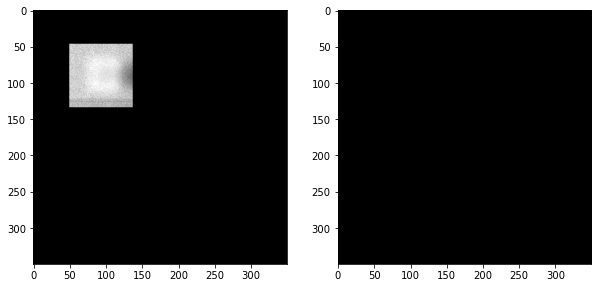

batch 41
1: pred_dist: [2.204432]


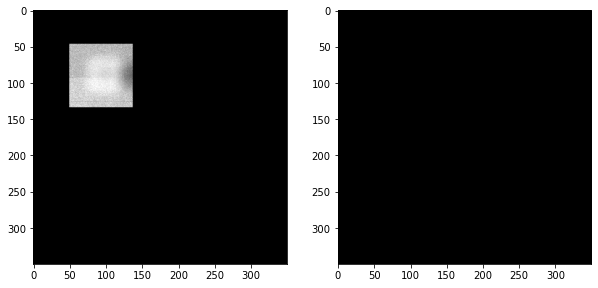

batch 42
1: pred_dist: [2.2172642]


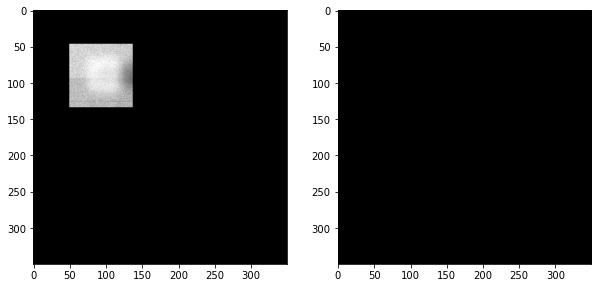

batch 43
1: pred_dist: [2.2117136]


KeyboardInterrupt: 

In [19]:
for i, batch in tqdm(enumerate(data_loaders), total=data_lengths, desc="Batch"):

    true_images= batch["image"]
    pred_masks, pred_dists = model(true_images.float().to(device))
    print("batch {}".format(i + 1))
    for j, (img, pr_msk, pr_dist) in enumerate(zip(true_images, pred_masks.cpu().detach().numpy(),
                                                                    pred_dists.cpu().detach().numpy())):
        print("{}: pred_dist: {}".format(j + 1, pr_dist))

        f = plt.figure(figsize=(10, 5))
        f.add_subplot(1, 2, 1)
        plt.imshow(img[0, ...], cmap='gray')
        f.add_subplot(1, 2, 2)
        plt.imshow(pr_msk[0, ...], cmap='gray')
        plt.show(block=True)
        
    #if i ==1:
    #    break

In [20]:
pos1_top_right_6_inv = os.path.join(root_folder_pos1, 'top_right_6_inv')

In [24]:
data_loaders, data_lengths = define_dataset(root_folder=pos1_top_right_6_inv,
                                           fname_key='File', alldata=True,
                                           batch_size=1, load_mask=False,
                                           row_slice=slice(1400,None),
                                           col_slice=slice(1000,None))

batch 1
1: pred_dist: [2.2978556]


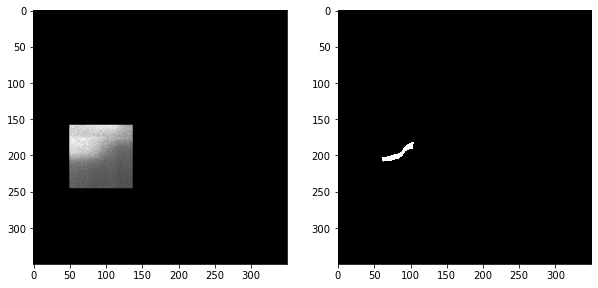

batch 2
1: pred_dist: [2.2447119]


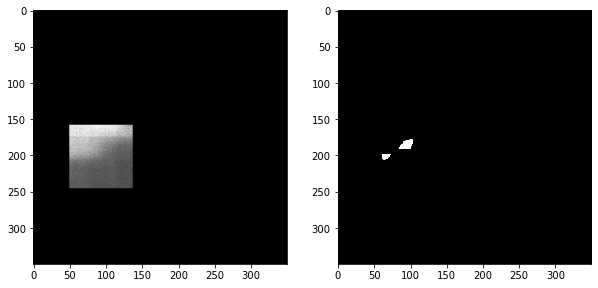

batch 3
1: pred_dist: [2.2805727]


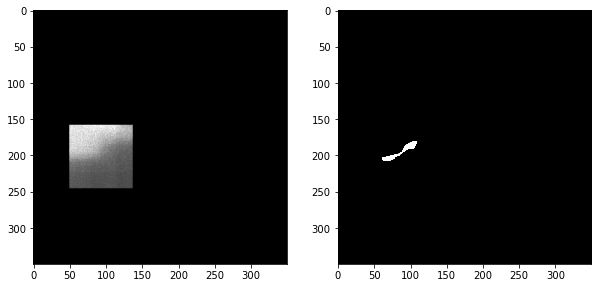

batch 4
1: pred_dist: [2.2902505]


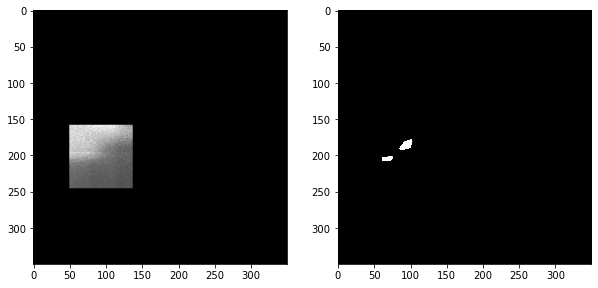

batch 5
1: pred_dist: [2.2386487]


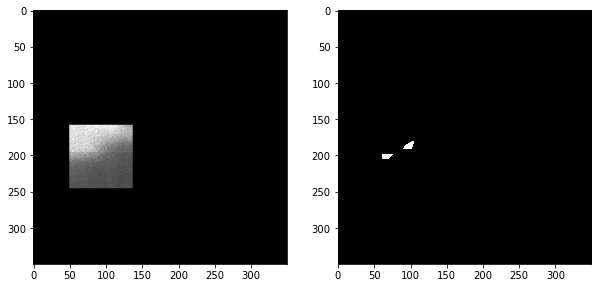

In [25]:
for i, batch in tqdm(enumerate(data_loaders), total=data_lengths, desc="Batch"):

    true_images= batch["image"]
    pred_masks, pred_dists = model(true_images.float().to(device))
    print("batch {}".format(i + 1))
    for j, (img, pr_msk, pr_dist) in enumerate(zip(true_images, pred_masks.cpu().detach().numpy(),
                                                                    pred_dists.cpu().detach().numpy())):
        print("{}: pred_dist: {}".format(j + 1, pr_dist))

        f = plt.figure(figsize=(10, 5))
        f.add_subplot(1, 2, 1)
        plt.imshow(img[0, ...], cmap='gray')
        f.add_subplot(1, 2, 2)
        plt.imshow(pr_msk[0, ...], cmap='gray')
        plt.show(block=True)
        
    if i ==4:
        break